We start by importing all relevant libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Training data is saved as train.csv

In [3]:
df = pd.read_csv('datasets/train.csv')

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
(df.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

### modification of column names

In [7]:
df.columns = [col.lower() for col in df.columns]#lowercase

In [8]:
df.columns = [col.replace(' ', '_') for col in df.columns]#snakecase

In [9]:
df.rename(columns={'3ssn_porch':'ssn3_porch', 
                   '2nd_flr_sf': 'flr2nd_sf'},inplace=True)#renaming certain columns based on data dictionary

In [10]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       'flr2nd_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'ga

In [11]:
df.isnull().sum()# missing values per column

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
saleprice         0
Length: 81, dtype: int64

In [12]:
df.isnull().sum().sum() #total number of missing values

9822

### ms_subclass-Nominal

In [12]:
#from data dictionary provided
values_for_ms_subclass = ('020','030','040','045','045','050','060','070','075','080','085','090','120','150','160','180','190')

In [13]:
df.ms_subclass = [str(entry) for entry in df.ms_subclass]

In [14]:
df.ms_subclass = ['0'+ entry if len(entry)==2 else entry for entry in df.ms_subclass]

**So ms_subclass has been modified as per data dictionary provided**

In [15]:
ms=sorted(df['ms_subclass'])

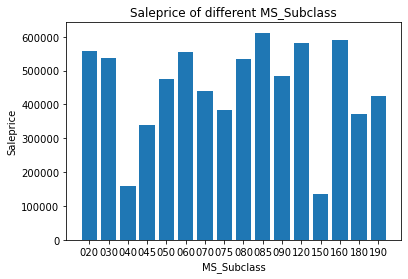

In [16]:
#bargraphs using matplotlib
plt.bar(sorted(df['ms_subclass']), df['saleprice'])
plt.xlabel('MS_Subclass')
plt.ylabel('Saleprice')
plt.title('Saleprice of different MS_Subclass' );

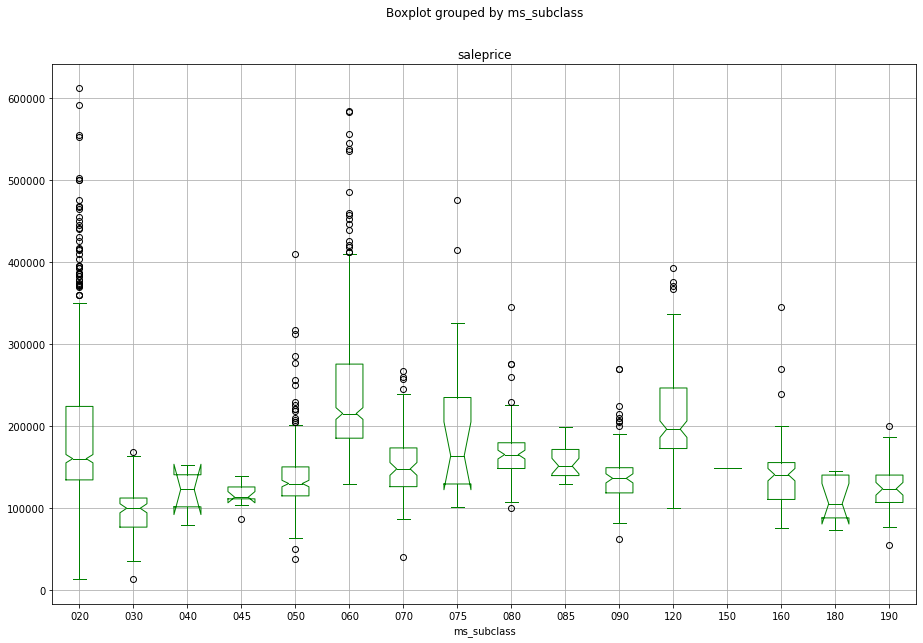

In [17]:
# boxplot using Pandas.boxplot
df.boxplot(column ='saleprice',by= 'ms_subclass',figsize=(15,10), color='green',notch=True );
#patch_artist=True,

### saleprice

Saleprice is our target or dependent variable and we intend to predict the saleprices in 'test.csv' data

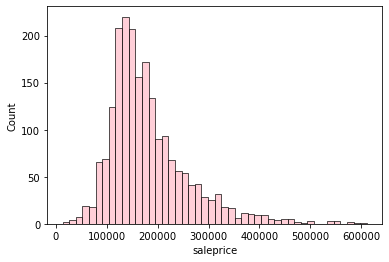

In [13]:
sns.histplot(df.saleprice,color='pink');

Right skew in saleprice, could do a log transform

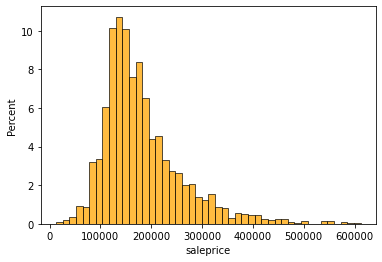

In [19]:
sns.histplot(df.saleprice, stat='percent', color='orange');# using percentage values

In [20]:
df.saleprice.isnull().sum() 

0

No null values in the target column

### ms_zoning column- Nominal

In [21]:
df.ms_zoning.unique()#unique values

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [22]:
df.ms_zoning.isnull().sum()# No null values in the column

0

In [23]:
df.ms_zoning.value_counts(dropna=False)

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [24]:
df[df.ms_zoning=='RL'] 

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,060,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,060,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,020,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,060,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,050,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,020,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,030,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,050,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,020,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


**RL can be either residential or park as per data dictionary, not reflected here**

In [25]:
dict_mszoning = {'C (all)':'C', 
                 'A (agr)':'A',
                 'I (all)':'I',
                 'RL':'RL',
                 'RM':'RM',
                 'FV':'FV',
                 'RH':'RH'}

In [26]:
df.ms_zoning = [dict_mszoning[entry] for entry in df.ms_zoning]#cleaned entries 

/var/folders/14/ql83cw_14pn_55xg8kg9ctcc0000gn/T/ipykernel_85105/1117146665.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(my_labels,
/var/folders/14/ql83cw_14pn_55xg8kg9ctcc0000gn/T/ipykernel_85105/1117146665.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(my_labels,


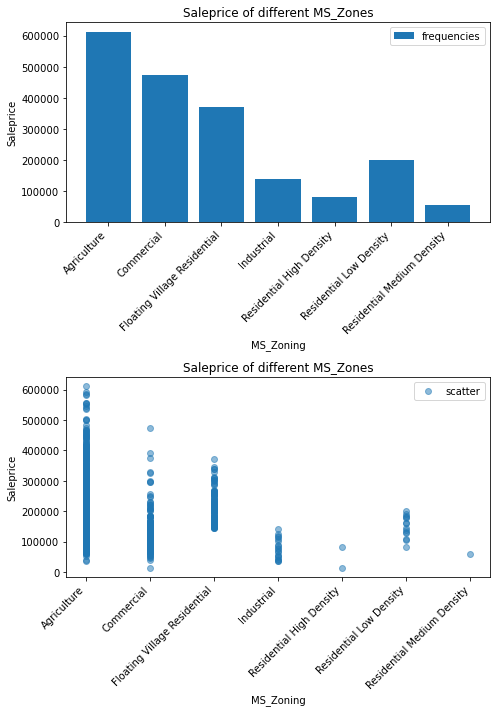

In [27]:
figure, ax = plt.subplots(2,1,figsize = (7,10))

my_labels= ['Agriculture','Commercial','Floating Village Residential','Industrial',
       'Residential High Density','Residential Low Density',
       'Residential Medium Density']

ax[0].bar(df['ms_zoning'], df['saleprice'],label='frequencies')
ax[0].set(xlabel='MS_Zoning',
          ylabel='Saleprice',
          title='Saleprice of different MS_Zones')
          
ax[0].set_xticklabels(my_labels,
                  rotation = 45,
                  horizontalalignment = 'right')

ax[0].legend()

ax[1].scatter(df['ms_zoning'], df['saleprice'],label='scatter', alpha=0.5)
ax[1].set(xlabel='MS_Zoning',
          ylabel='Saleprice',
          title='Saleprice of different MS_Zones')
ax[1].set_xticklabels(my_labels,
                  rotation = 45,
                  horizontalalignment = 'right')
          
ax[1].legend()

plt.tight_layout()
plt.show()

Residential medium density and residential high density have only one poijt each so can be disregrded if required

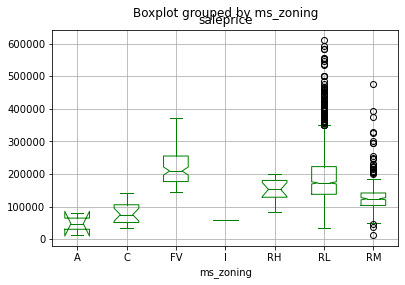

In [28]:

df.boxplot(column ='saleprice',by= 'ms_zoning',color='green',notch=True);


Too many outliers in each boxplot of saleprice by mszone.

### lotfrontage-Continuous-Linear feet of street connected to property

In [29]:
df.lot_frontage.isnull().sum()

330

In [30]:
df.lot_frontage.unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [31]:
df.lot_frontage.interpolate(method='nearest',inplace=True)
#interpolation of values

In [32]:
df.lot_frontage.isnull().sum()

1

In [33]:
df[df.lot_frontage.isnull()]
#first entry#

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,060,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [34]:
df.iloc[0,4]=df.iloc[1,4]
#changing first entry based on second entry which lies in same ms_subclass


In [35]:
df[df.lot_frontage<0]# checking for negative values

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


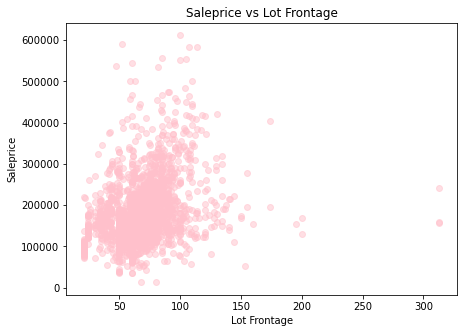

In [36]:
figure, ax = plt.subplots(1,1,figsize = (7,5))

ax.scatter(df['lot_frontage'], df['saleprice'],color='pink', alpha=0.5)
ax.set(xlabel='Lot Frontage',
          ylabel='Saleprice',
          title='Saleprice vs Lot Frontage')

plt.show()

Outliers over lot frontage>200

### lot_area-continuous

In [37]:
df.lot_area.isnull().sum()

0

In [38]:
df[df.lot_area<0]# checking for negative values

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


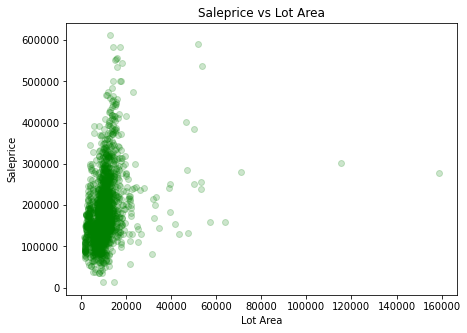

In [39]:
figure, ax = plt.subplots(1,1,figsize = (7,5))

ax.scatter(df['lot_area'], df['saleprice'],color='g', alpha=0.2)
ax.set(xlabel='Lot Area',
          ylabel='Saleprice',
          title='Saleprice vs Lot Area')

plt.show()

Outliers for lot area>6000

### street-nominal

In [40]:
df.street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [41]:
df.street.isnull().sum()

0

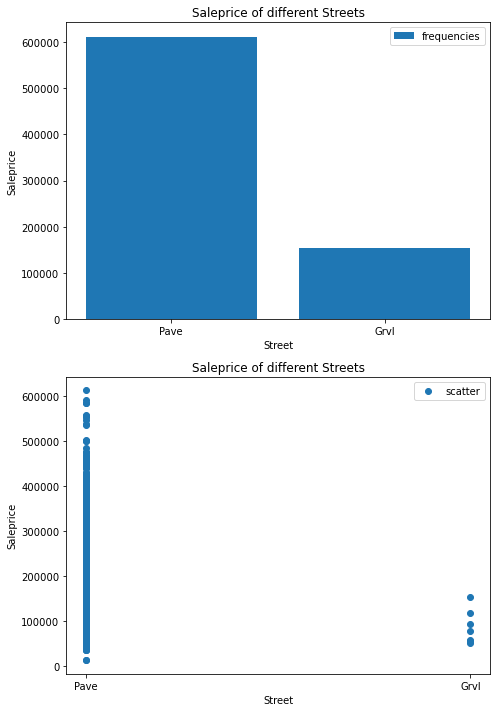

In [42]:
figure, ax = plt.subplots(2,1,figsize = (7,10))

ax[0].bar(df['street'], df['saleprice'],label='frequencies')
ax[0].set(xlabel='Street',
          ylabel='Saleprice',
          title='Saleprice of different Streets')
          


ax[0].legend()
ax[1].scatter(df['street'], df['saleprice'],label='scatter')
ax[1].set(xlabel='Street',
          ylabel='Saleprice',
          title='Saleprice of different Streets')

ax[1].legend()
plt.tight_layout()
plt.show()

More likely to find paved streets

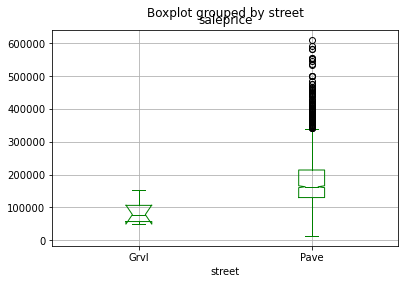

In [43]:
df.boxplot(column ='saleprice',by= 'street',color='green',notch=True );


### Alley (Nominal): Type of alley access to property

In [44]:
df.alley.unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [45]:
df.alley.value_counts(dropna=False)


NaN     1911
Grvl      85
Pave      55
Name: alley, dtype: int64

Too many missing values so I will drop the entire column

### Lot Shape (Ordinal): General shape of property

In [46]:
df.lot_shape.unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [47]:
df.lot_shape.isnull().sum()

0

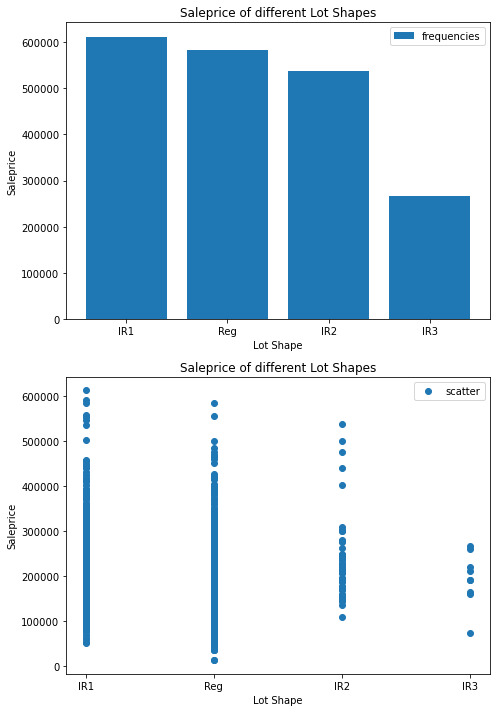

In [48]:
figure, ax = plt.subplots(2,1,figsize = (7,10))

ax[0].bar(df['lot_shape'], df['saleprice'],label='frequencies')
ax[0].set(xlabel='Lot Shape',
          ylabel='Saleprice',
          title='Saleprice of different Lot Shapes')
          


ax[0].legend()
ax[1].scatter(df['lot_shape'], df['saleprice'],label='scatter')
ax[1].set(xlabel='Lot Shape',
          ylabel='Saleprice',
          title='Saleprice of different Lot Shapes')

ax[1].legend()
plt.tight_layout()
plt.show()

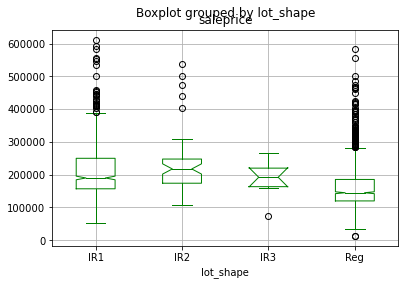

In [49]:
df.boxplot(column ='saleprice',by= 'lot_shape',color='green',notch=True);


### Land Contour (Nominal): Flatness of the property

In [50]:
df.land_contour.unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [51]:
df.land_contour.isna().sum()

0

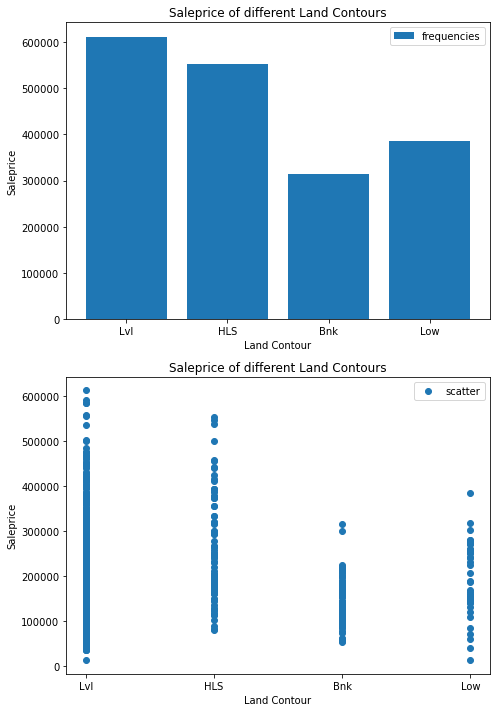

In [52]:
figure, ax = plt.subplots(2,1,figsize = (7,10))

ax[0].bar(df['land_contour'], df['saleprice'],label='frequencies')
ax[0].set(xlabel='Land Contour',
          ylabel='Saleprice',
          title='Saleprice of different Land Contours')
          


ax[0].legend()
ax[1].scatter(df['land_contour'], df['saleprice'],label='scatter')
ax[1].set(xlabel='Land Contour',
          ylabel='Saleprice',
          title='Saleprice of different Land Contours')

ax[1].legend()
plt.tight_layout()
plt.show()

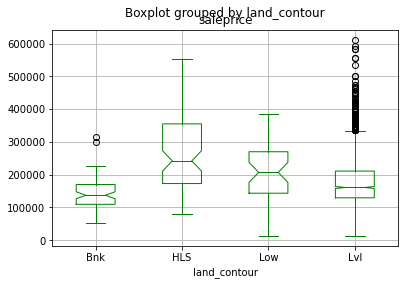

In [53]:
df.boxplot(column ='saleprice',by= 'land_contour',color='green',notch=True);

### Utilities (Ordinal): Type of utilities available

In [54]:
df.utilities.unique()

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [55]:
df.utilities.value_counts(dropna=False)

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

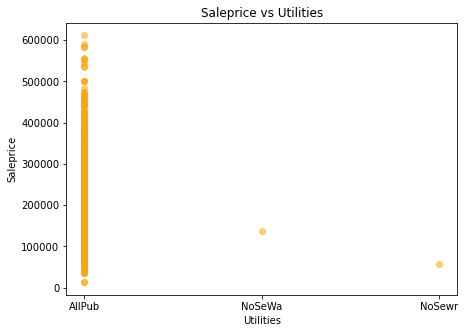

In [56]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.scatter(df['utilities'], df['saleprice'],label='scatter', c='orange', alpha=0.5)
ax.set(xlabel='Utilities',
          ylabel='Saleprice',
          title='Saleprice vs Utilities');

All except 2 points are AllPub in utilities column

### Lot Config (Nominal): Lot configuration

In [57]:
df.lot_config.unique()

array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object)

In [58]:
df.lot_config.value_counts(dropna=False)

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

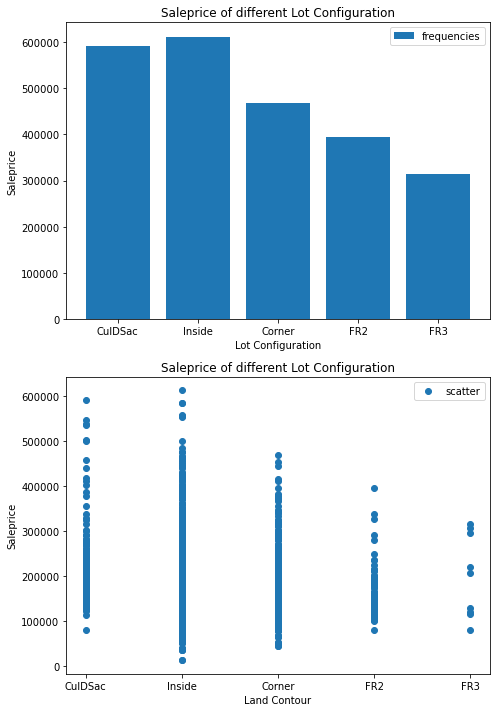

In [59]:
figure, ax = plt.subplots(2,1,figsize = (7,10))

ax[0].bar(df['lot_config'], df['saleprice'],label='frequencies')
ax[0].set(xlabel='Lot Configuration',
          ylabel='Saleprice',
          title='Saleprice of different Lot Configuration')
          


ax[0].legend()
ax[1].scatter(df['lot_config'], df['saleprice'],label='scatter')
ax[1].set(xlabel='Land Contour',
          ylabel='Saleprice',
          title='Saleprice of different Lot Configuration')

ax[1].legend()
plt.tight_layout()
plt.show()

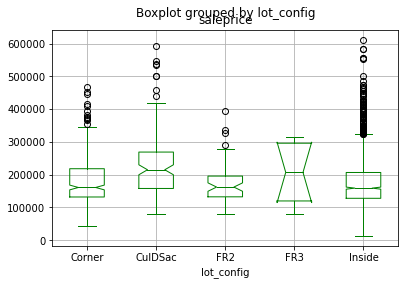

In [60]:
df.boxplot(column ='saleprice',by= 'lot_config',color='green',notch=True);

### Part Completion

Completed till now
- [x]'id'
- [x]'pid'
- [x]'ms_subclass'
- [x]'ms_zoning'
- [x]'lot_frontage'
- [x]'lot_area'
- [x]'street'
- [x]'lot_shape'
- [x]'land_contour'
- [x]'utilities'
- [x]'lot_config'

### Automation for other columns

We will try to automate by comparing column values with respective data dictionary. For this I created dictionaries.

In [61]:
nominal=['pid','ms_subclass','ms_zoning','street','alley','land_contour','lot_config',
         'neighborhood','condition_1','condition_2', 'bldg_type',
       'house_style','roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type','foundation','heating','central_air',
        'garage_type','misc_feature']

ordinal=['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond',
        'bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2',
         'heating_qc','electrical','kitchen_qual','functional','fireplace_qu',
         'garage_finish','garage_qual','garage_cond','paved_drive','pool_qc',
         'fence']
discrete =['year_built','year_remod/add','bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr','totrms_abvgrd',
          'fireplaces','garage_yr_blt','garage_cars','mo_sold', 'yr_sold']
continuous= ['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1',
    'bsmtfin_sf_2','bsmt_unf_sf', 'total_bsmt_sf','1st_flr_sf', 'flr2nd_sf', 'low_qual_fin_sf',
    'gr_liv_area','garage_area','wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 'ssn3_porch',
       'screen_porch', 'pool_area','misc_val']

### Nominal Entries, Unique values etc

In [62]:
# for nominal entries

result = pd.DataFrame([[col, df[col].unique(),len(df[col].unique()), df[col].isnull().sum(), type(col)] for col in nominal], columns=['column','unique_values','#unique_values','#missing_values','type'])
result

,column,unique_values,#unique_values,#missing_values,type
0,pid,"[533352170, 531379050, 535304180, 916386060, 9...",2051,0,<class 'str'>
1,ms_subclass,"[060, 020, 050, 180, 160, 070, 120, 190, 085, ...",16,0,<class 'str'>
2,ms_zoning,"[RL, RM, FV, C, A, RH, I]",7,0,<class 'str'>
3,street,"[Pave, Grvl]",2,0,<class 'str'>
4,alley,"[nan, Pave, Grvl]",3,1911,<class 'str'>
5,land_contour,"[Lvl, HLS, Bnk, Low]",4,0,<class 'str'>
6,lot_config,"[CulDSac, Inside, Corner, FR2, FR3]",5,0,<class 'str'>
7,neighborhood,"[Sawyer, SawyerW, NAmes, Timber, Edwards, OldT...",28,0,<class 'str'>
8,condition_1,"[RRAe, Norm, PosA, Artery, Feedr, PosN, RRAn, ...",9,0,<class 'str'>
9,condition_2,"[Norm, RRNn, Feedr, Artery, PosA, PosN, RRAe, ...",8,0,<class 'str'>


In [63]:

#Neighbourhood-Nominal
string = """    Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	Greens
       GrnHill	Green Hills
       IDOTRR	Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker"""

dict_neighborhood = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}



# result[]

In [64]:
#Lot Config (Nominal): Lot configuration
string="""Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property"""   
dict_lot_config = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}


In [65]:
#Condition 1 (Nominal): Proximity to various conditions

string="""Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad"""
dict_condition_1 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}


In [66]:
#Condition 2 (Nominal): Proximity to various conditions (if more than one is present)

string="""Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad""" 
dict_condition_2 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_condition2

In [67]:
#Land Slope (Ordinal): Slope of property
		
string="""Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope"""
	
dict_land_slope = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}

In [68]:
#Bldg Type (Nominal): Type of dwelling
		
string="""1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit"""
	
dict_bldg_type = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}


In [69]:
#House Style (Nominal): Style of dwelling
	
string="""1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level"""
dict_house_style = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_house_style

In [70]:
#Overall Qual (Ordinal): Rates the overall material and finish of the house
string="""10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor"""
# [s.strip().split('\t') for s in string.split('\n')]
dict_overall_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_overall_qual

In [71]:
#Overall Cond (Ordinal): Rates the overall condition of the house

string="""10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor"""
dict_overall_cond = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_overall_cond

In [72]:
#Roof Style (Nominal): Type of roof

string="""Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed"""
dict_roof_style = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_roof_style

In [73]:
#Roof Matl (Nominal): Roof material

string="""ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles"""
dict_roof_mat1 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_roof_mat1

In [74]:
#Exterior 1 (Nominal): Exterior covering on house

string="""AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles"""
dict_exterior_1 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_exterior_1

In [75]:
#Exterior 2 (Nominal): Exterior covering on house (if more than one material)

string="""AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles"""
dict_exterior_2 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_exterior_2

In [76]:
#Mas Vnr Type (Nominal): Masonry veneer type

string="""BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone"""
dict_mas_vnr_type = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_mas_vnr_type

In [77]:
#Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
		
string="""Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor"""
dict_exter_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_exter_qual

In [78]:
#Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior

string="""Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor"""
dict_exter_cond = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_exter_cond

In [79]:
#Foundation (Nominal): Type of foundation

string="""BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood"""
dict_foundation = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_foundation

In [80]:
#Bsmt Qual (Ordinal): Evaluates the height of the basement

string="""Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement"""
dict_bsmt_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_qual

In [81]:
#Bsmt Cond (Ordinal): Evaluates the general condition of the basement

string="""Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement"""
dict_bsmt_cond = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_cond

In [82]:
#Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

string="""Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement"""
dict_bsmt_exposure = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_exposure

In [83]:
#BsmtFin Type 1	(Ordinal): Rating of basement finished area

string="""GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement"""
dict_bsmtfin_type_1 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_fin_type1

In [84]:
#BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

string="""GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement"""
dict_bsmtfin_type_2 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_fin_type2

In [85]:
#Heating	(Nominal): Type of heating

string="""Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace"""
dict_heating = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_heating

In [86]:
#HeatingQC (Ordinal): Heating quality and condition

string="""Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor"""
dict_heating_qc = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_heatingQC

In [87]:
#Central Air (Nominal): Central air conditioning

string="""N	No
       Y	Yes"""
dict_central_air = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_central_air

In [88]:
#Electrical (Ordinal): Electrical system

string="""SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed"""
dict_electrical = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_electrical

In [89]:
#KitchenQual (Ordinal): Kitchen quality

string="""Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor"""
dict_kitchen_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_kitchen_qual

In [90]:
#Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

string="""Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only"""
dict_functional = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_functional

In [91]:
#FireplaceQu (Ordinal): Fireplace quality

string="""Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace"""
dict_fireplace_qu = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_fireplaceQu

In [92]:
#Garage Type (Nominal): Garage location

string="""2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage"""
dict_garage_type = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_garage_type

In [93]:
#Garage Finish (Ordinal)	: Interior finish of the garage

string="""Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage"""
dict_garage_finish = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_garage_finish

In [94]:
#Garage Qual (Ordinal): Garage quality

string="""Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage"""
dict_garage_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_garage_qual

In [95]:
#Garage Cond (Ordinal): Garage condition

string="""Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage"""
dict_garage_cond = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_garage_cond

In [96]:
#'paved_drive'
string=""" Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel"""
dict_paved_drive = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_paved_drive

In [97]:
#Pool QC (Ordinal): Pool quality

string="""Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool"""
dict_pool_qc = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_pool_qc

In [98]:
#Misc Feature (Nominal): Miscellaneous feature not covered in other categories
string="""Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None"""
dict_misc_feature = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_misc_feature

In [99]:
#Fence (Ordinal): Fence quality

string="""GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence"""
dict_fence = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_fence.keys()

In [100]:
df[nominal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pid           2051 non-null   int64 
 1   ms_subclass   2051 non-null   object
 2   ms_zoning     2051 non-null   object
 3   street        2051 non-null   object
 4   alley         140 non-null    object
 5   land_contour  2051 non-null   object
 6   lot_config    2051 non-null   object
 7   neighborhood  2051 non-null   object
 8   condition_1   2051 non-null   object
 9   condition_2   2051 non-null   object
 10  bldg_type     2051 non-null   object
 11  house_style   2051 non-null   object
 12  roof_style    2051 non-null   object
 13  roof_matl     2051 non-null   object
 14  exterior_1st  2051 non-null   object
 15  exterior_2nd  2051 non-null   object
 16  mas_vnr_type  2029 non-null   object
 17  foundation    2051 non-null   object
 18  heating       2051 non-null   object
 19  centra

In [101]:
value_validation_nominal={}
for col in nominal:
    try:
        keys = eval('dict_' + col).keys()
        flag = set(df[col].unique()).issubset(keys)
        value_validation_nominal[col] = flag
    except NameError:
        pass
    except KeyError:
        pass
value_validation_nominal


{'lot_config': True,
 'neighborhood': False,
 'condition_1': True,
 'condition_2': True,
 'bldg_type': False,
 'house_style': True,
 'roof_style': True,
 'mas_vnr_type': False,
 'foundation': True,
 'heating': True,
 'central_air': True,
 'garage_type': False,
 'misc_feature': False}

### Neighborhood

In [102]:
t1 = set(df['neighborhood'].unique())
t1


{'Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Greens',
 'GrnHill',
 'IDOTRR',
 'Landmrk',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker'}

In [103]:
t2= set(dict_neighborhood.keys())
t2

{'Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Greens',
 'GrnHill',
 'IDOTRR',
 'Landmrk',
 'MeadowV',
 'Mitchel',
 'NPkVill',
 'NWAmes',
 'Names',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker'}

In [104]:
t1 - t2 # finding entries in the given data but not indictionary

{'NAmes'}

In [105]:
df.loc[df["neighborhood"] == "NAmes", "neighborhood"] = 'Names'
#modifying as per dictionary

In [106]:
df['neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'Names', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

We will repeat this procedure for all col where we got a false in validation above to check

### Building Type 

In [107]:
a=set(df['bldg_type'].unique())
a

{'1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'}

In [108]:
b=set(dict_bldg_type.keys())
b

{'1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'}

In [109]:
df.loc[df["bldg_type"] == "Twnhs", "bldg_type"] = 'TwnhsI'
df.loc[df['bldg_type']=='2fmCon',"bldg_type"] = '2FmCon'
df.loc[df['bldg_type']=='Duplex', "bldg_type"] = 'Duplx'

In [110]:
set(df['bldg_type'].unique())

{'1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'}

#### mas_vnr_type-1218 None and 22 NaN

In [111]:
a=set(df['mas_vnr_type'].unique())
a

{'BrkCmn', 'BrkFace', 'None', 'Stone', nan}

In [112]:
b=set(dict_mas_vnr_type.keys())
b

{'BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'}

In [113]:
df.mas_vnr_type.value_counts(dropna=False)

None       1218
BrkFace     630
Stone       168
NaN          22
BrkCmn       13
Name: mas_vnr_type, dtype: int64

### Garage Type

In [114]:
x=set(df['garage_type'].unique())
x

{'2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', nan}

In [115]:
y=set(dict_garage_type.keys())
y

{'2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'}

In [116]:
df.garage_type.value_counts(dropna=False)

Attchd     1213
Detchd      536
BuiltIn     132
NaN         113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [117]:
value_validation_nominal={}
for col in nominal:
    try:
        keys = eval('dict_' + col).keys()
        flag = set(df[col].unique()).issubset(keys)
        value_validation_nominal[col] = flag
    except NameError :
        pass
    except KeyError:
        pass
value_validation_nominal


{'lot_config': True,
 'neighborhood': True,
 'condition_1': True,
 'condition_2': True,
 'bldg_type': True,
 'house_style': True,
 'roof_style': True,
 'mas_vnr_type': False,
 'foundation': True,
 'heating': True,
 'central_air': True,
 'garage_type': False,
 'misc_feature': False}

In [118]:
df.drop(columns='alley',inplace=True)
df.drop(columns='misc_feature',inplace=True)

In [119]:
value_validation_nominal={}
for col in nominal:
    try:
        keys = eval('dict_' + col).keys()
        flag = set(df[col].unique()).issubset(keys)
        value_validation_nominal[col] = flag
    except NameError :
        pass
    except KeyError:
        pass
value_validation_nominal

{'lot_config': True,
 'neighborhood': True,
 'condition_1': True,
 'condition_2': True,
 'bldg_type': True,
 'house_style': True,
 'roof_style': True,
 'mas_vnr_type': False,
 'foundation': True,
 'heating': True,
 'central_air': True,
 'garage_type': False}

In [120]:
df[['mas_vnr_type','garage_type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mas_vnr_type  2029 non-null   object
 1   garage_type   1938 non-null   object
dtypes: object(2)
memory usage: 32.2+ KB


### Ordinal variables cleaning

In [121]:
df[ordinal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lot_shape       2051 non-null   object
 1   utilities       2051 non-null   object
 2   land_slope      2051 non-null   object
 3   overall_qual    2051 non-null   int64 
 4   overall_cond    2051 non-null   int64 
 5   exter_qual      2051 non-null   object
 6   exter_cond      2051 non-null   object
 7   bsmt_qual       1996 non-null   object
 8   bsmt_cond       1996 non-null   object
 9   bsmt_exposure   1993 non-null   object
 10  bsmtfin_type_1  1996 non-null   object
 11  bsmtfin_type_2  1995 non-null   object
 12  heating_qc      2051 non-null   object
 13  electrical      2051 non-null   object
 14  kitchen_qual    2051 non-null   object
 15  functional      2051 non-null   object
 16  fireplace_qu    1051 non-null   object
 17  garage_finish   1937 non-null   object
 18  garage_q

In [122]:
result = pd.DataFrame([[col, df[col].unique(),len(df[col].unique()), df[col].isnull().sum()] for col in ordinal], columns=['column','unique_values','#unique_values','#missing_values'])
result

,column,unique_values,#unique_values,#missing_values
0,lot_shape,"[IR1, Reg, IR2, IR3]",4,0
1,utilities,"[AllPub, NoSeWa, NoSewr]",3,0
2,land_slope,"[Gtl, Sev, Mod]",3,0
3,overall_qual,"[6, 7, 5, 8, 10, 4, 9, 3, 2, 1]",10,0
4,overall_cond,"[8, 5, 7, 6, 3, 9, 2, 4, 1]",9,0
5,exter_qual,"[Gd, TA, Ex, Fa]",4,0
6,exter_cond,"[TA, Gd, Fa, Ex, Po]",5,0
7,bsmt_qual,"[TA, Gd, Fa, nan, Ex, Po]",6,55
8,bsmt_cond,"[TA, Gd, nan, Fa, Po, Ex]",6,55
9,bsmt_exposure,"[No, Gd, Av, nan, Mn]",5,58


In [123]:
value_validation_ordinal={}
for col in ordinal:
    try:
        keys = eval('dict_' + col).keys()
        flag = set(df[col].unique()).issubset(keys)
        value_validation_ordinal[col] = flag
    except NameError:
        pass
    except KeyError:
        pass
value_validation_ordinal

{'land_slope': True,
 'overall_qual': False,
 'overall_cond': False,
 'exter_qual': True,
 'exter_cond': True,
 'bsmt_qual': False,
 'bsmt_cond': False,
 'bsmt_exposure': False,
 'bsmtfin_type_1': False,
 'bsmtfin_type_2': False,
 'heating_qc': True,
 'electrical': True,
 'kitchen_qual': True,
 'functional': True,
 'fireplace_qu': False,
 'garage_finish': False,
 'garage_qual': False,
 'garage_cond': False,
 'paved_drive': True,
 'pool_qc': False,
 'fence': False}

### Overall Condition

In [124]:
c=(df['overall_cond'].unique())
c

array([8, 5, 7, 6, 3, 9, 2, 4, 1])

In [125]:
d=set(dict_overall_cond.keys())
d

{'1', '10', '2', '3', '4', '5', '6', '7', '8', '9'}

### Overall Quality

In [126]:
a=df.overall_qual.unique()
a

array([ 6,  7,  5,  8, 10,  4,  9,  3,  2,  1])

In [127]:
b=dict_overall_qual.keys()
b

dict_keys(['10', '9', '8', '7', '6', '5', '4', '3', '2', '1'])

### bsmt quality

In [128]:
a=df.bsmt_qual.unique()
a

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [129]:
b=dict_bsmt_qual.keys()
b

dict_keys(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'])

### bsmt_cond

In [130]:
a=df.bsmt_cond.unique()
a

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [131]:
b = dict_bsmt_cond.keys()
b

dict_keys(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'])

### bsmt_exposure

In [132]:
a=df.bsmt_exposure.unique()
a

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [133]:
b=dict_bsmt_exposure.keys()
b

dict_keys(['Gd', 'Av', 'Mn', 'No', 'NA'])

#### bsmtfin_type_1

In [134]:
a=df.bsmtfin_type_1.unique()
a

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [135]:
b=dict_bsmtfin_type_1.keys()
b

dict_keys(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'])

#### bsmtfin_type_2

In [136]:
a=df.bsmtfin_type_2.unique()
a

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [137]:
b=dict_bsmtfin_type_2.keys()
b

dict_keys(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'])

#### fireplace_qu

In [138]:
a=df.fireplace_qu.unique()
a

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [139]:
b=dict_fireplace_qu.keys()
b

dict_keys(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'])

### garage_finish

In [140]:
a=df.garage_finish.unique()
a

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [141]:
b=dict_garage_finish.keys()
b

dict_keys(['Fin', 'RFn', 'Unf', 'NA'])

### garage_qual

In [142]:
a=df.garage_qual.unique()
a

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [143]:
b=dict_garage_qual.keys()
b

dict_keys(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'])

### garage_cond

In [144]:
a=df.garage_cond.unique()
a

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [145]:
b=dict_garage_cond.keys()
b

dict_keys(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'])

### pool_qc

In [146]:
df.drop(columns='pool_qc',inplace=True)

#### fence

In [147]:
df.drop(columns='fence',inplace=True)

In [148]:
value_validation_ordinal={}
for col in ordinal:
    try:
        keys = eval('dict_' + col).keys()
        flag = set(df[col].unique()).issubset(keys)
        value_validation_ordinal[col] = flag
    except NameError:
        pass
    except KeyError:
        pass
value_validation_ordinal

{'land_slope': True,
 'overall_qual': False,
 'overall_cond': False,
 'exter_qual': True,
 'exter_cond': True,
 'bsmt_qual': False,
 'bsmt_cond': False,
 'bsmt_exposure': False,
 'bsmtfin_type_1': False,
 'bsmtfin_type_2': False,
 'heating_qc': True,
 'electrical': True,
 'kitchen_qual': True,
 'functional': True,
 'fireplace_qu': False,
 'garage_finish': False,
 'garage_qual': False,
 'garage_cond': False,
 'paved_drive': True}

In [149]:
df['fireplace_qu'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: fireplace_qu
Non-Null Count  Dtype 
--------------  ----- 
1051 non-null   object
dtypes: object(1)
memory usage: 16.1+ KB


**Ordinal Columns Cleaned to the best I could**

### Dealing with discrete columns

In [150]:
discrete

['year_built',
 'year_remod/add',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'mo_sold',
 'yr_sold']

In [151]:
df[discrete].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year_built      2051 non-null   int64  
 1   year_remod/add  2051 non-null   int64  
 2   bsmt_full_bath  2049 non-null   float64
 3   bsmt_half_bath  2049 non-null   float64
 4   full_bath       2051 non-null   int64  
 5   half_bath       2051 non-null   int64  
 6   bedroom_abvgr   2051 non-null   int64  
 7   kitchen_abvgr   2051 non-null   int64  
 8   totrms_abvgrd   2051 non-null   int64  
 9   fireplaces      2051 non-null   int64  
 10  garage_yr_blt   1937 non-null   float64
 11  garage_cars     2050 non-null   float64
 12  mo_sold         2051 non-null   int64  
 13  yr_sold         2051 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 224.5 KB


#### bsmt_full_bath

In [152]:
df.bsmt_full_bath.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: bsmt_full_bath
Non-Null Count  Dtype  
--------------  -----  
2049 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


In [153]:
df.bsmt_full_bath.value_counts(dropna=False)#checking for nans

0.0    1200
1.0     824
2.0      23
NaN       2
3.0       2
Name: bsmt_full_bath, dtype: int64

In [154]:
df.bsmt_full_bath.interpolate(method='nearest',inplace=True)
#interpolation of values

In [155]:
df.bsmt_full_bath.value_counts(dropna=False)

0.0    1202
1.0     824
2.0      23
3.0       2
Name: bsmt_full_bath, dtype: int64

#### bsmt_half_bath

In [156]:
df.bsmt_half_bath.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: bsmt_half_bath
Non-Null Count  Dtype  
--------------  -----  
2049 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


In [157]:
df.bsmt_half_bath.value_counts(dropna=False)

0.0    1923
1.0     122
2.0       4
NaN       2
Name: bsmt_half_bath, dtype: int64

In [158]:
df.bsmt_half_bath.interpolate(method='nearest',inplace=True)
#interpolation of values

In [159]:
df.bsmt_half_bath.value_counts(dropna=False)

0.0    1925
1.0     122
2.0       4
Name: bsmt_half_bath, dtype: int64

#### garage_yr_blt

In [160]:
df.garage_yr_blt.value_counts(dropna=False)

NaN       114
2005.0    105
2007.0     84
2006.0     80
2004.0     72
         ... 
1918.0      1
2207.0      1
1933.0      1
1895.0      1
1919.0      1
Name: garage_yr_blt, Length: 101, dtype: int64

In [161]:
df.garage_yr_blt.interpolate(method='nearest',inplace=True)

In [162]:
df.garage_yr_blt.value_counts(dropna=False)

2005.0    113
2007.0     89
2006.0     84
2004.0     76
2003.0     70
         ... 
1918.0      1
2207.0      1
1933.0      1
1895.0      1
1919.0      1
Name: garage_yr_blt, Length: 100, dtype: int64

#### garage_cars

In [163]:
df.garage_cars.value_counts(dropna=False)

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
NaN       1
Name: garage_cars, dtype: int64

In [164]:
df.garage_cars.interpolate(method='nearest',inplace=True)

In [165]:
df.garage_cars.value_counts(dropna=False)

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: garage_cars, dtype: int64

### Checking for negative values in discrete

In [166]:

d={}

for col in discrete:
    count=0
    flag=0
    for entry in df[col]:
        if entry<0:
            flag=1 #flag becomes 1 if there is a negative value
            count+=1# counts the number of negative values
            
    d[col]=(flag,count)
            

In [167]:
d

{'year_built': (0, 0),
 'year_remod/add': (0, 0),
 'bsmt_full_bath': (0, 0),
 'bsmt_half_bath': (0, 0),
 'full_bath': (0, 0),
 'half_bath': (0, 0),
 'bedroom_abvgr': (0, 0),
 'kitchen_abvgr': (0, 0),
 'totrms_abvgrd': (0, 0),
 'fireplaces': (0, 0),
 'garage_yr_blt': (0, 0),
 'garage_cars': (0, 0),
 'mo_sold': (0, 0),
 'yr_sold': (0, 0)}

**No negative values in discrete columns**

In [168]:
df[discrete].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year_built      2051 non-null   int64  
 1   year_remod/add  2051 non-null   int64  
 2   bsmt_full_bath  2051 non-null   float64
 3   bsmt_half_bath  2051 non-null   float64
 4   full_bath       2051 non-null   int64  
 5   half_bath       2051 non-null   int64  
 6   bedroom_abvgr   2051 non-null   int64  
 7   kitchen_abvgr   2051 non-null   int64  
 8   totrms_abvgrd   2051 non-null   int64  
 9   fireplaces      2051 non-null   int64  
 10  garage_yr_blt   2051 non-null   float64
 11  garage_cars     2051 non-null   float64
 12  mo_sold         2051 non-null   int64  
 13  yr_sold         2051 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 224.5 KB


### Continuous Variables

In [169]:
continuous

['lot_frontage',
 'lot_area',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 'flr2nd_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 'ssn3_porch',
 'screen_porch',
 'pool_area',
 'misc_val']

In [170]:
df[continuous].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lot_frontage     2051 non-null   float64
 1   lot_area         2051 non-null   int64  
 2   mas_vnr_area     2029 non-null   float64
 3   bsmtfin_sf_1     2050 non-null   float64
 4   bsmtfin_sf_2     2050 non-null   float64
 5   bsmt_unf_sf      2050 non-null   float64
 6   total_bsmt_sf    2050 non-null   float64
 7   1st_flr_sf       2051 non-null   int64  
 8   flr2nd_sf        2051 non-null   int64  
 9   low_qual_fin_sf  2051 non-null   int64  
 10  gr_liv_area      2051 non-null   int64  
 11  garage_area      2050 non-null   float64
 12  wood_deck_sf     2051 non-null   int64  
 13  open_porch_sf    2051 non-null   int64  
 14  enclosed_porch   2051 non-null   int64  
 15  ssn3_porch       2051 non-null   int64  
 16  screen_porch     2051 non-null   int64  
 17  pool_area     

In [171]:
df.bsmtfin_sf_1.interpolate(method='nearest',inplace=True)

In [172]:
df.bsmtfin_sf_2.interpolate(method='nearest',inplace=True)

In [173]:
df.bsmt_unf_sf.interpolate(method='nearest',inplace=True)

In [174]:
df.total_bsmt_sf.interpolate(method='nearest',inplace=True)

In [175]:
df.garage_area.interpolate(method='nearest',inplace=True)

In [176]:
df.mas_vnr_area.interpolate(method='nearest',inplace=True)

In [177]:
df[continuous].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lot_frontage     2051 non-null   float64
 1   lot_area         2051 non-null   int64  
 2   mas_vnr_area     2051 non-null   float64
 3   bsmtfin_sf_1     2051 non-null   float64
 4   bsmtfin_sf_2     2051 non-null   float64
 5   bsmt_unf_sf      2051 non-null   float64
 6   total_bsmt_sf    2051 non-null   float64
 7   1st_flr_sf       2051 non-null   int64  
 8   flr2nd_sf        2051 non-null   int64  
 9   low_qual_fin_sf  2051 non-null   int64  
 10  gr_liv_area      2051 non-null   int64  
 11  garage_area      2051 non-null   float64
 12  wood_deck_sf     2051 non-null   int64  
 13  open_porch_sf    2051 non-null   int64  
 14  enclosed_porch   2051 non-null   int64  
 15  ssn3_porch       2051 non-null   int64  
 16  screen_porch     2051 non-null   int64  
 17  pool_area     

No null values now in the continuous category of variables

### Checking for negative values in continuous columns

In [178]:
d={}

for col in continuous:
    count=0
    flag=0
    for entry in df[col]:
        if entry<0:
            flag=1#flag becomes 1 if there is a negative value
            count+=1# counts the number of negative values
            
    d[col]=(flag,count)
            

In [179]:
d

{'lot_frontage': (0, 0),
 'lot_area': (0, 0),
 'mas_vnr_area': (0, 0),
 'bsmtfin_sf_1': (0, 0),
 'bsmtfin_sf_2': (0, 0),
 'bsmt_unf_sf': (0, 0),
 'total_bsmt_sf': (0, 0),
 '1st_flr_sf': (0, 0),
 'flr2nd_sf': (0, 0),
 'low_qual_fin_sf': (0, 0),
 'gr_liv_area': (0, 0),
 'garage_area': (0, 0),
 'wood_deck_sf': (0, 0),
 'open_porch_sf': (0, 0),
 'enclosed_porch': (0, 0),
 'ssn3_porch': (0, 0),
 'screen_porch': (0, 0),
 'pool_area': (0, 0),
 'misc_val': (0, 0)}

**No negative values in any continuous columns**

### Imputing nominal nans

In [180]:
from sklearn.impute import SimpleImputer
imp_most_frequent = SimpleImputer(strategy= "most_frequent")
#using most frequent strategy in SImpleImputer()

In [181]:
nominal_nan= ['mas_vnr_type','garage_type']
#the nominal variables with nan values found in the analysis above

In [182]:
df[nominal_nan].isnull().sum()
# nulls#

mas_vnr_type     22
garage_type     113
dtype: int64

In [183]:
df[nominal_nan] = pd.DataFrame(imp_most_frequent.fit_transform(df[nominal_nan]),
                       columns=nominal_nan)
#imputing and saving back
df[nominal_nan].isnull().sum()

mas_vnr_type    0
garage_type     0
dtype: int64

After imputation there are no nulls in nominal variables

### imputing ordinal nans

In [184]:
df.dropna(axis=1, thresh=df.shape[0]/2,inplace=True)
#dropping any column with more than half missing values 

In [185]:
ordinal_nan= ['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','garage_finish','garage_qual','garage_cond','fireplace_qu']
#ordinal variables with nans found in the analysis above

In [186]:
df[ordinal_nan].isnull().sum()
#checking for nulls

bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_type_2      56
garage_finish      114
garage_qual        114
garage_cond        114
fireplace_qu      1000
dtype: int64

In [187]:
#imputing and saving back
df[ordinal_nan] = pd.DataFrame(imp_most_frequent.fit_transform(df[ordinal_nan]),
                       columns=ordinal_nan)

df[ordinal_nan].isnull().sum()
#no nulls

bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
garage_finish     0
garage_qual       0
garage_cond       0
fireplace_qu      0
dtype: int64

#### Checking the dataframe after all the cleaning and imputing

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   object 
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     2051 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   lot_shape        2051 non-null   object 
 8   land_contour     2051 non-null   object 
 9   utilities        2051 non-null   object 
 10  lot_config       2051 non-null   object 
 11  land_slope       2051 non-null   object 
 12  neighborhood     2051 non-null   object 
 13  condition_1      2051 non-null   object 
 14  condition_2      2051 non-null   object 
 15  bldg_type        2051 non-null   object 
 16  house_style      2051 non-null   object 
 17  overall_qual  

**All well till here**

In [299]:
df.drop(columns='id',inplace=True)# dropping the id column as it's no use

KeyError: "['id'] not found in axis"

#### Scatter Plots for all features

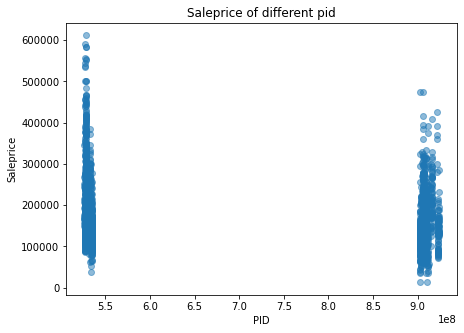

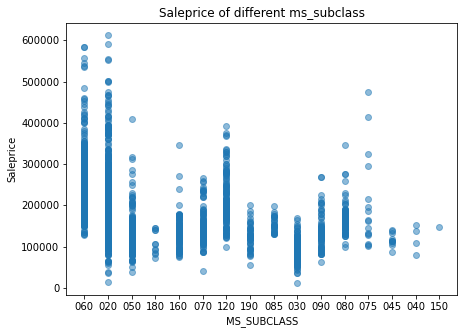

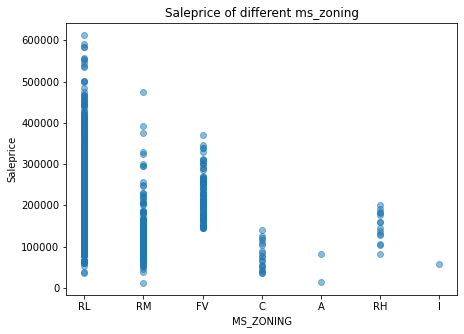

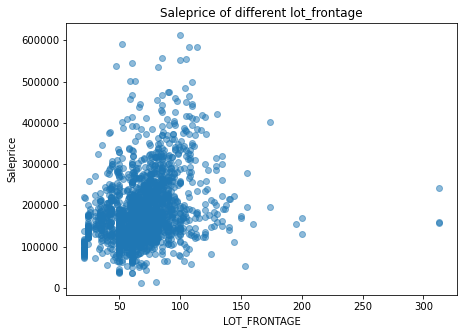

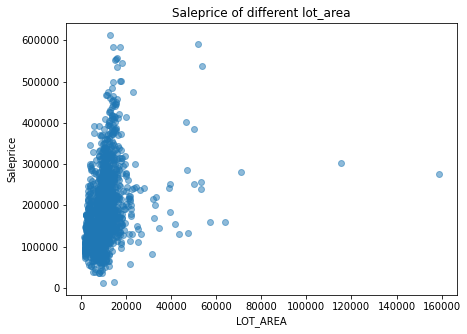

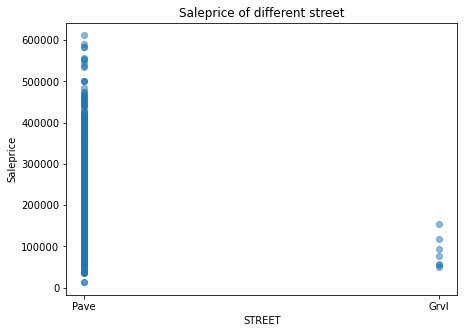

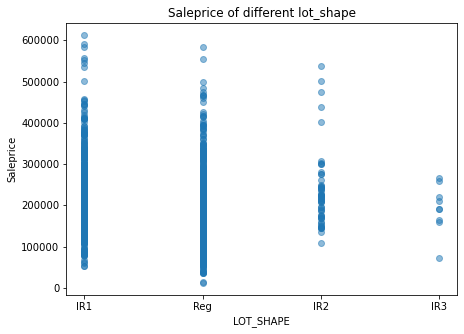

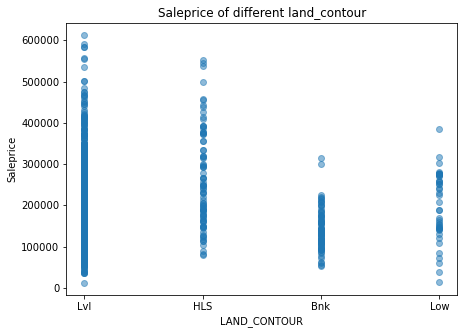

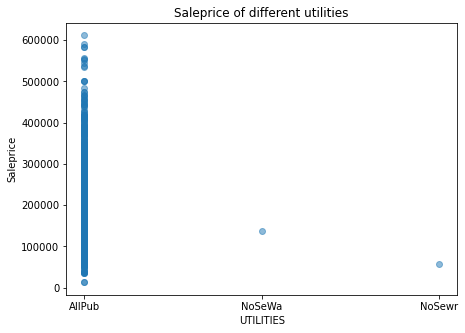

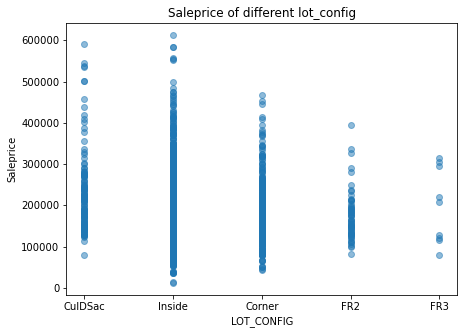

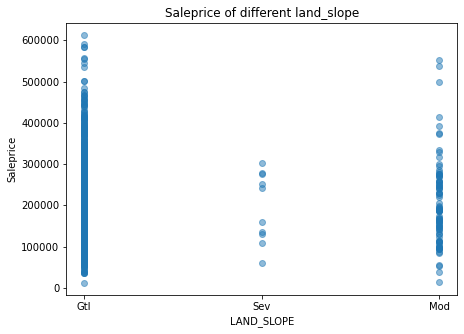

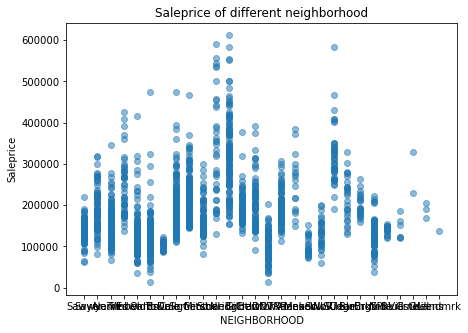

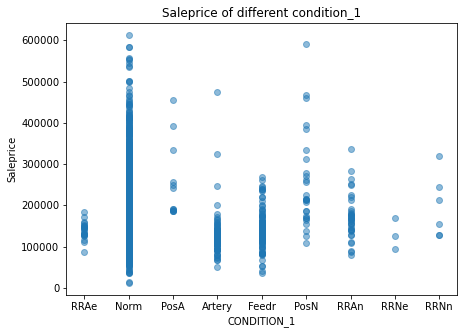

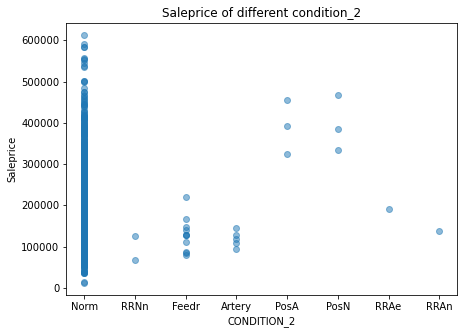

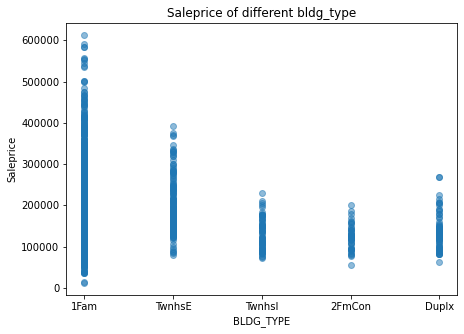

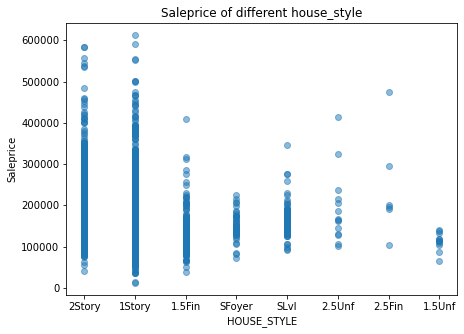

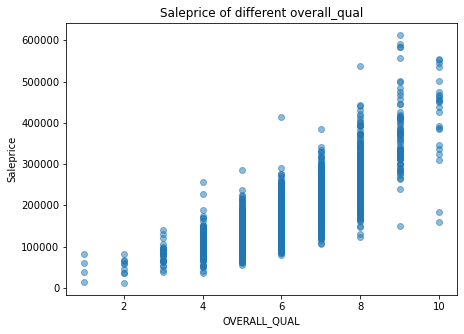

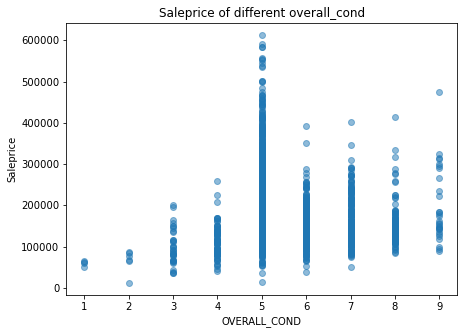

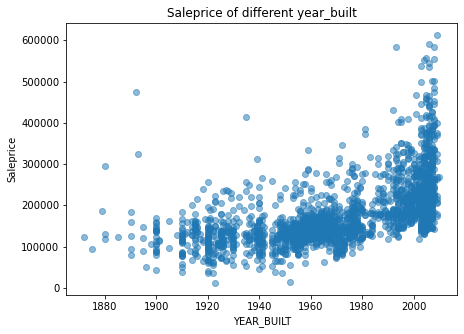

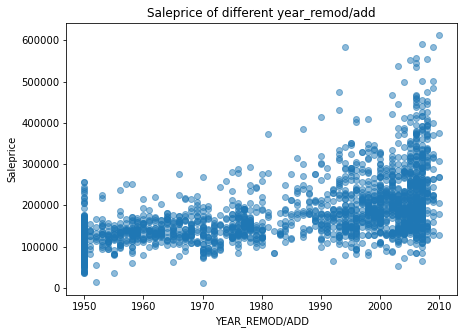

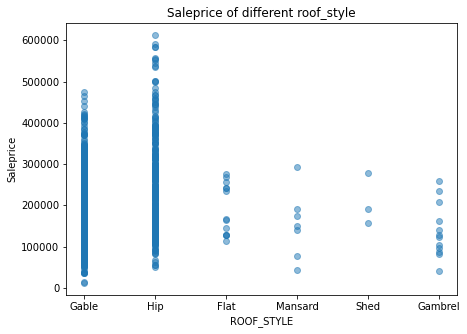

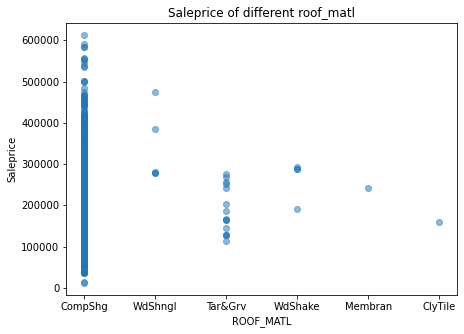

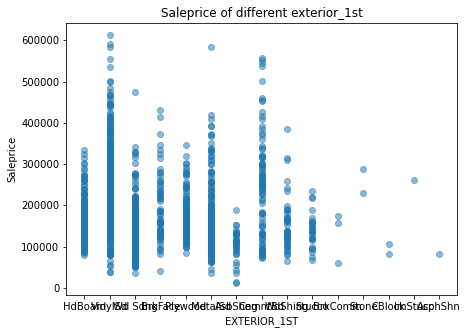

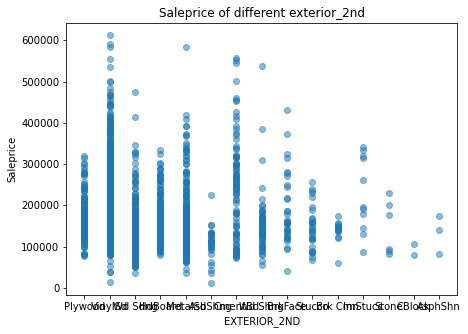

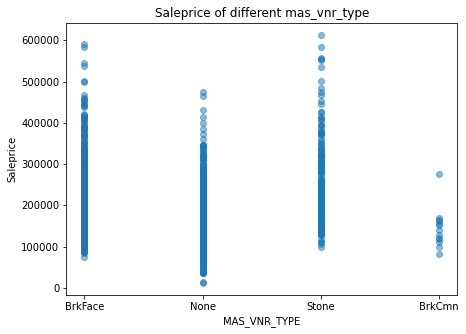

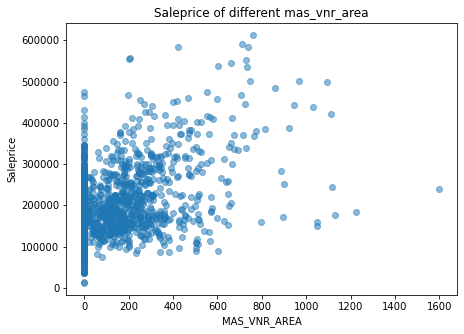

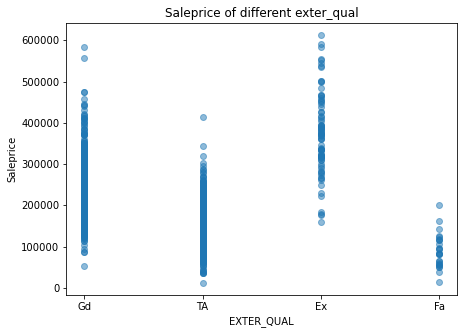

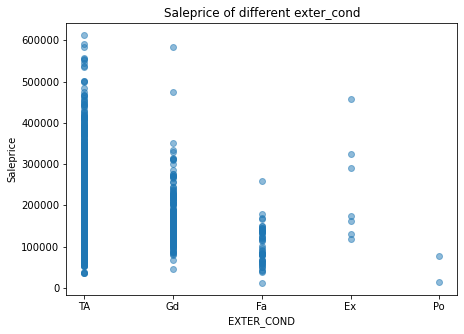

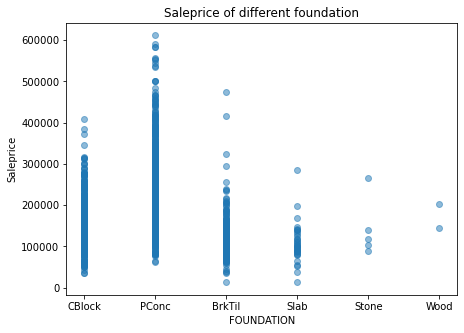

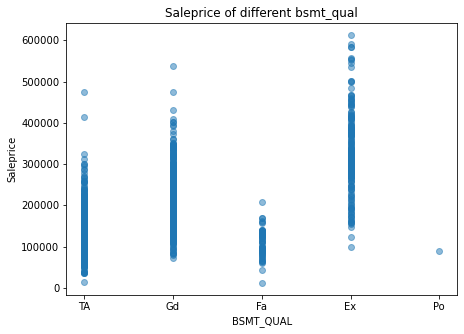

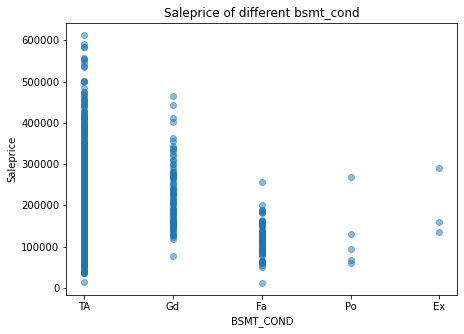

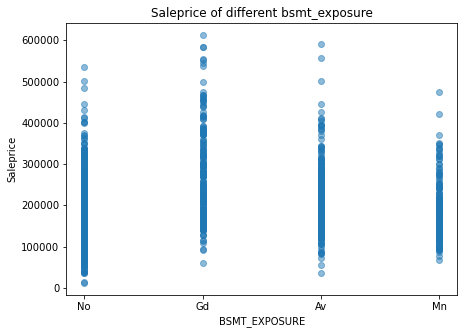

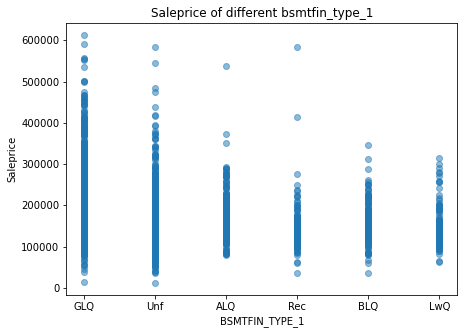

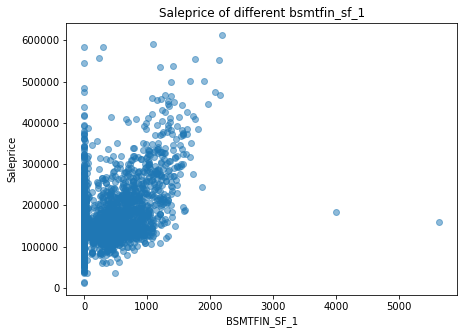

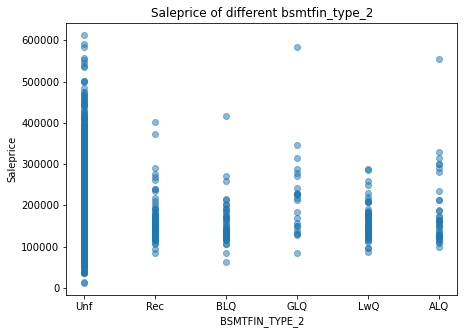

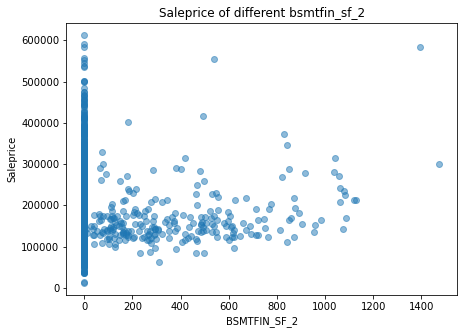

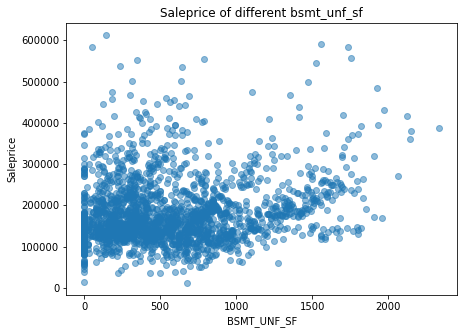

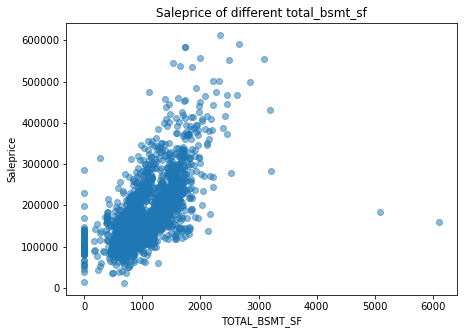

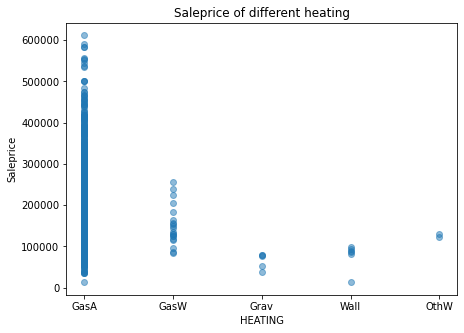

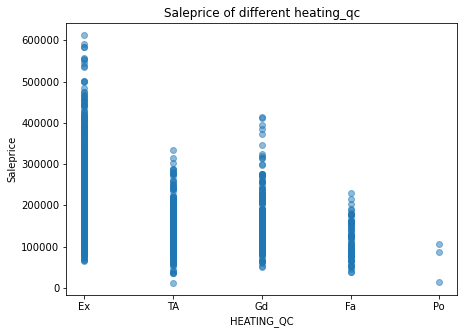

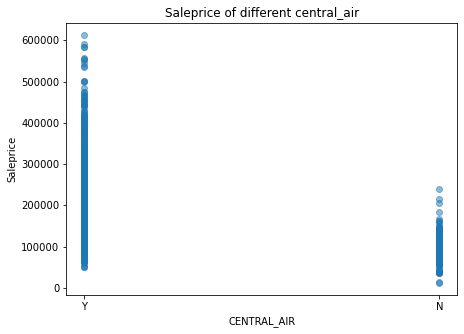

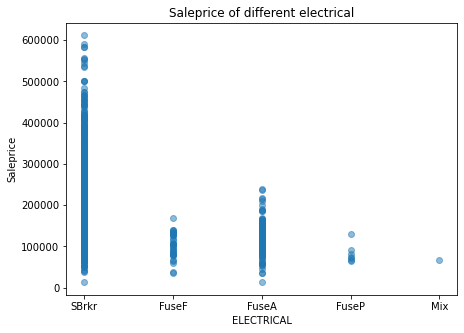

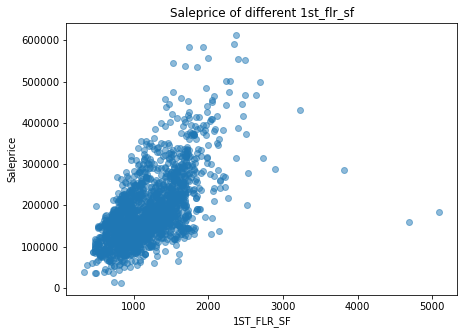

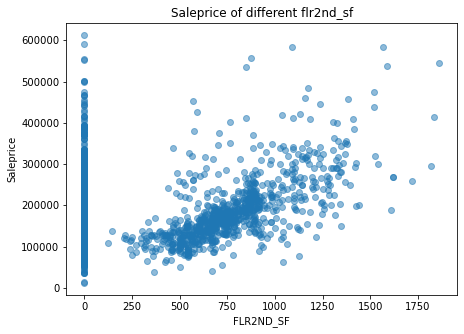

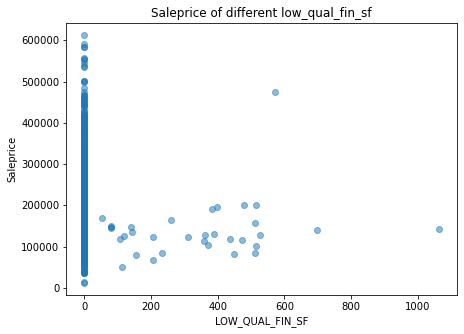

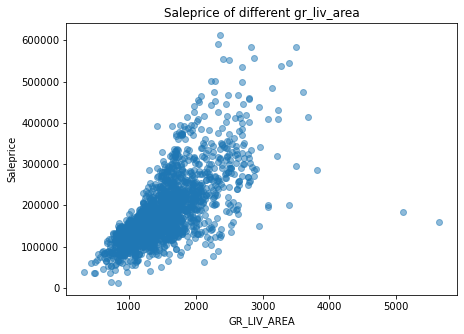

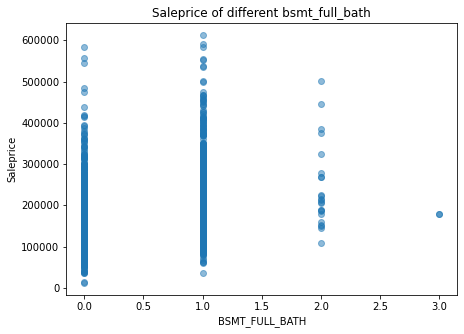

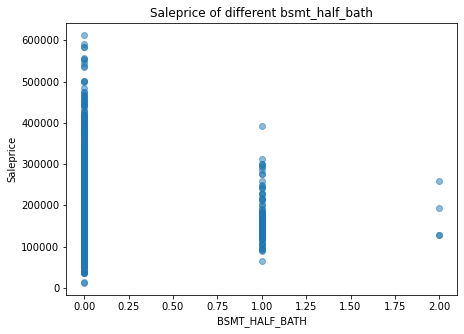

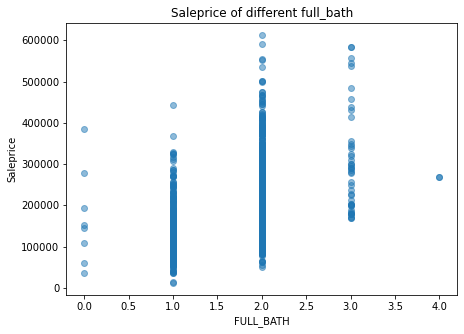

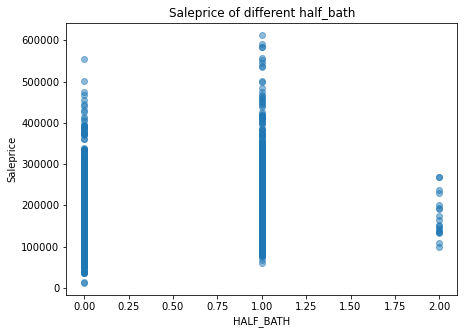

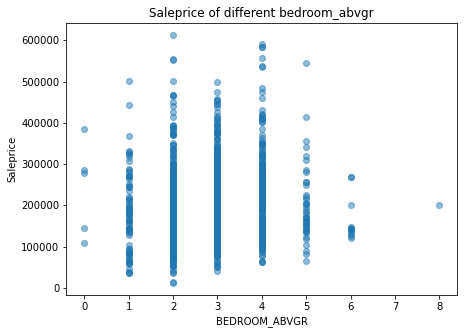

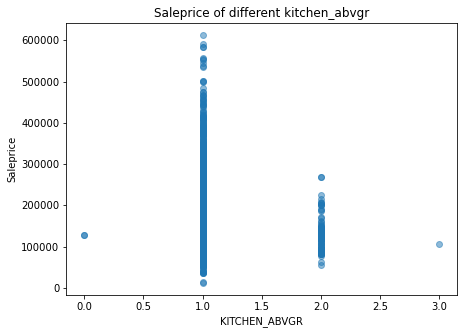

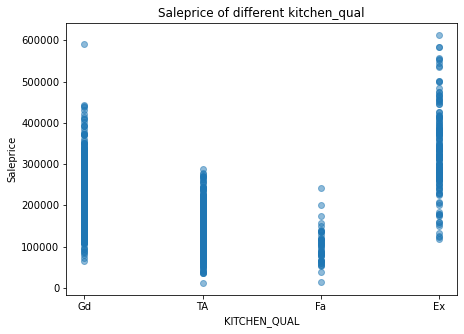

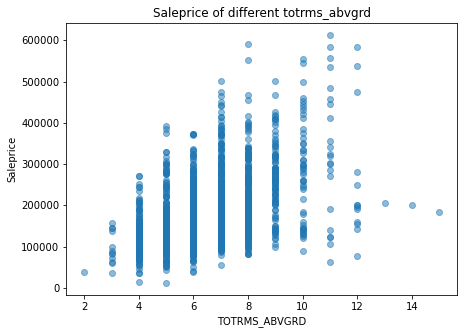

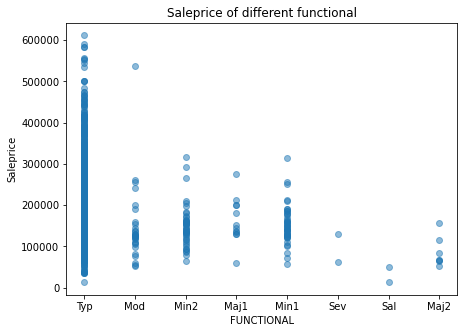

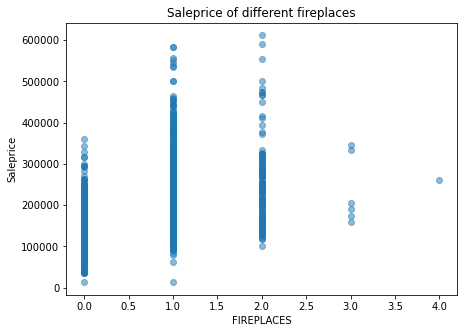

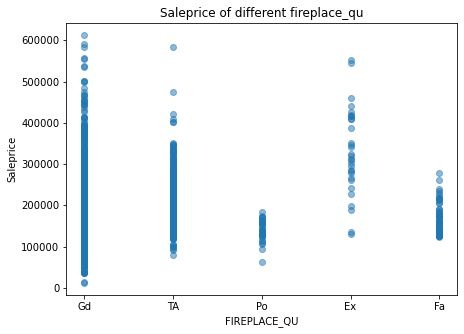

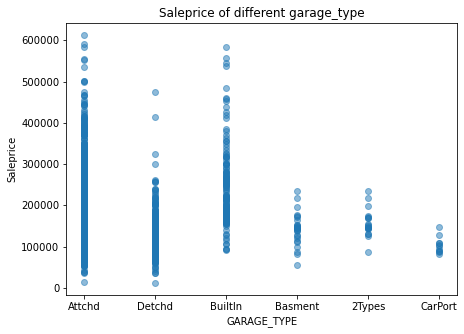

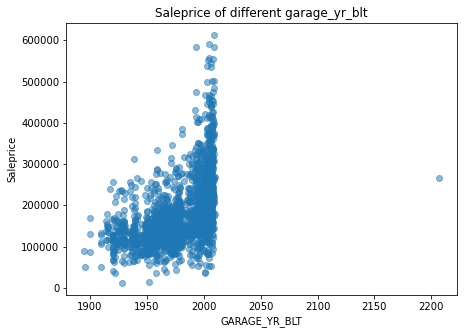

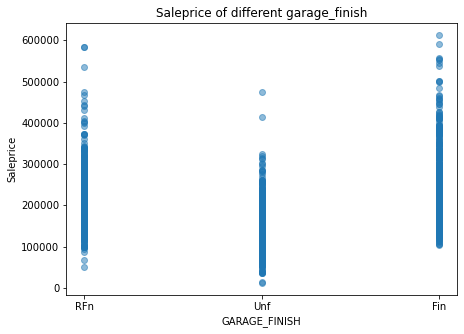

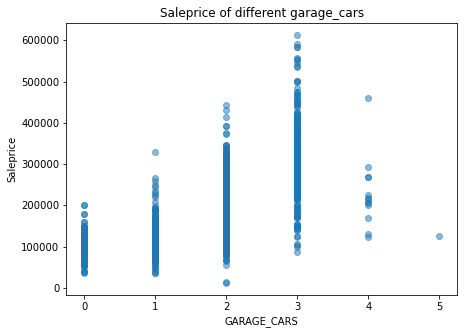

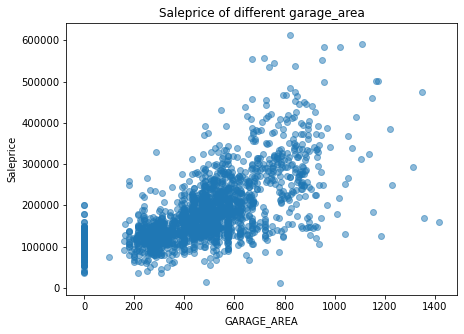

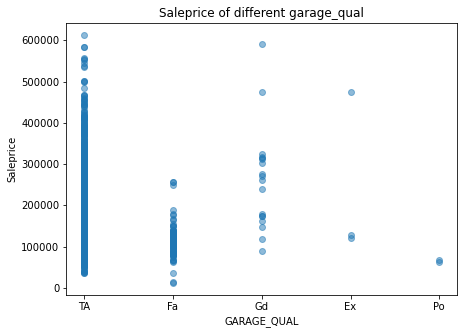

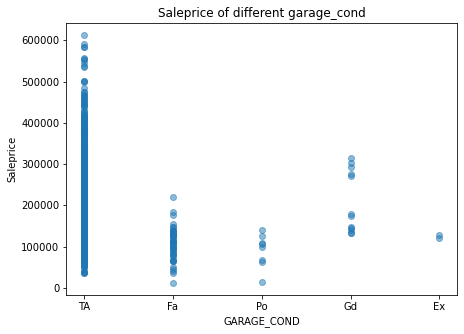

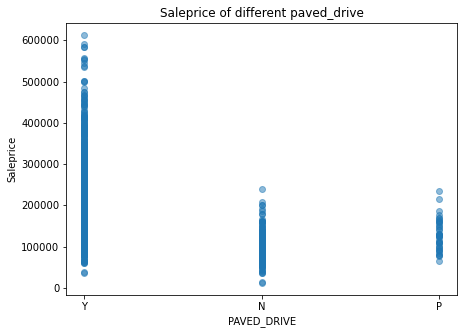

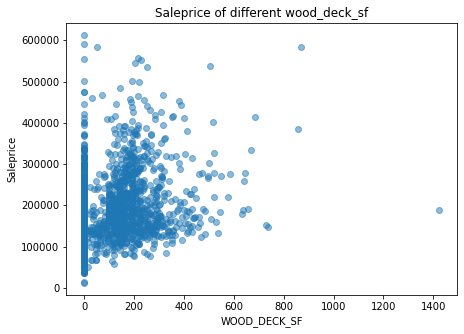

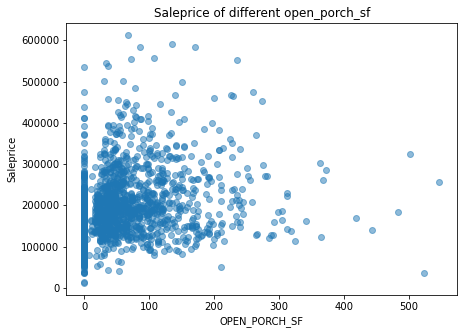

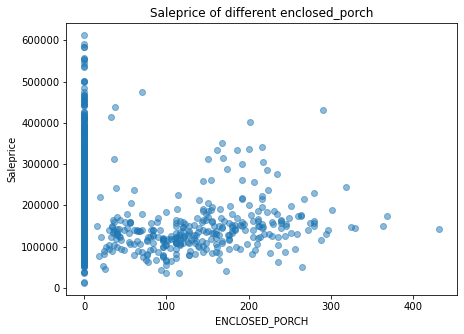

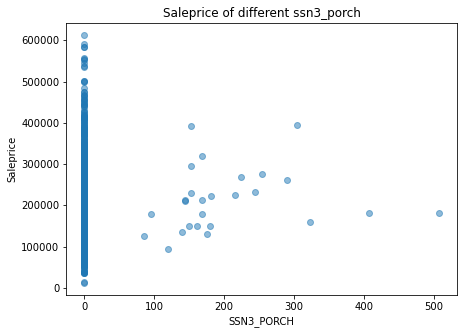

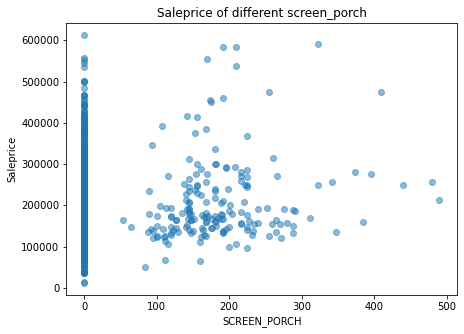

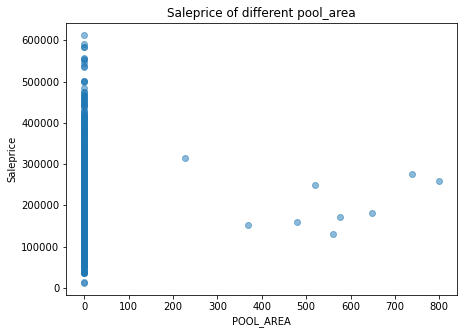

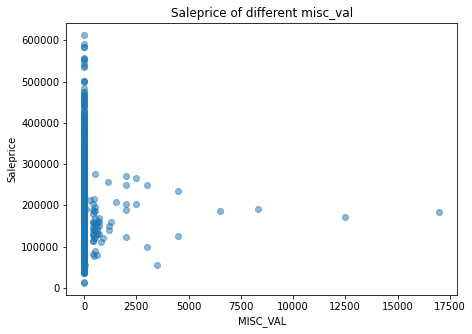

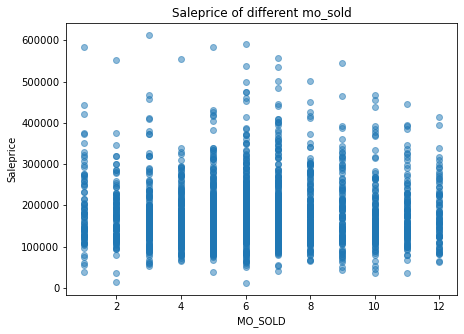

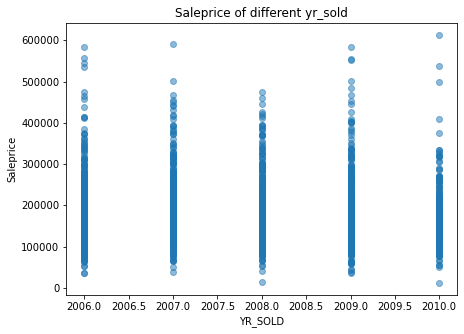

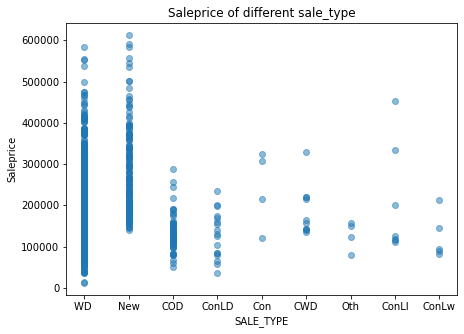

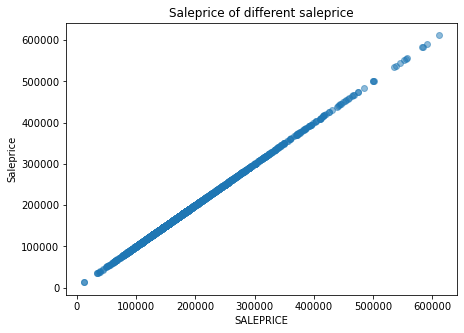

In [192]:
for col in df.columns:
    figure, ax = plt.subplots(1,1,figsize = (7,5))
    
    ax.scatter(df[col], df['saleprice'],label='scatter',alpha=0.5)
    ax.set(xlabel=col.upper(),
              ylabel='Saleprice',
              title=('Saleprice of different '+col))
    plt.show()

In [193]:
df.drop(df[df.garage_yr_blt>2022].index,inplace=True)
# removing the entry with garage yr built over 2022 based on the scatter plots above

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2050 non-null   int64  
 1   ms_subclass      2050 non-null   object 
 2   ms_zoning        2050 non-null   object 
 3   lot_frontage     2050 non-null   float64
 4   lot_area         2050 non-null   int64  
 5   street           2050 non-null   object 
 6   lot_shape        2050 non-null   object 
 7   land_contour     2050 non-null   object 
 8   utilities        2050 non-null   object 
 9   lot_config       2050 non-null   object 
 10  land_slope       2050 non-null   object 
 11  neighborhood     2050 non-null   object 
 12  condition_1      2050 non-null   object 
 13  condition_2      2050 non-null   object 
 14  bldg_type        2050 non-null   object 
 15  house_style      2050 non-null   object 
 16  overall_qual     2050 non-null   int64  
 17  overall_cond  

#### Saving the file

In [195]:
df.to_csv('datasets/cleaned_train_data.csv', index=False)
#cleaned data file with no nulls

#### checking yet again for nulls

In [196]:
df.isnull().sum().sum()# no nulls anywhere

0

#### correlation between different  continuous variables and feature selection and engineering

In [197]:
(df[continuous+['saleprice']]).corr()

,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,flr2nd_sf,low_qual_fin_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,ssn3_porch,screen_porch,pool_area,misc_val,saleprice
lot_frontage,1.000000,0.356891,0.161024,0.174915,0.029508,0.094525,0.283977,0.376362,0.019005,0.001610,0.314403,0.296365,0.101789,0.159632,-0.009254,0.021173,0.072579,0.135255,0.042589,0.290542
lot_area,0.356891,1.000000,0.167978,0.215696,0.041763,0.041232,0.277580,0.381823,0.029304,0.001259,0.327451,0.263168,0.155667,0.140792,0.014091,0.019540,0.067679,0.115096,0.093912,0.296794
mas_vnr_area,0.161024,0.167978,1.000000,0.316998,-0.015678,0.080769,0.399624,0.381944,0.099695,-0.061535,0.381003,0.378895,0.162868,0.155046,-0.107830,0.011109,0.086156,0.012360,0.078801,0.502199
bsmtfin_sf_1,0.174915,0.215696,0.316998,1.000000,-0.050060,-0.473720,0.539189,0.462334,-0.167504,-0.078280,0.215721,0.331242,0.214505,0.140697,-0.076714,0.047773,0.093385,0.075949,0.130071,0.423825
bsmtfin_sf_2,0.029508,0.041763,-0.015678,-0.050060,1.000000,-0.231279,0.086830,0.095927,-0.087505,-0.002764,0.001272,0.013629,0.105971,-0.004382,0.004540,-0.024225,0.096405,0.061026,-0.005515,0.016590
bsmt_unf_sf,0.094525,0.041232,0.080769,-0.473720,-0.231279,1.000000,0.418789,0.301880,-0.012683,0.059620,0.234384,0.145354,-0.034652,0.116267,-0.010728,0.020445,-0.055476,-0.039196,-0.005860,0.189603
total_bsmt_sf,0.283977,0.277580,0.399624,0.539189,0.086830,0.418789,1.000000,0.808703,-0.216640,-0.022349,0.453961,0.488946,0.224808,0.257931,-0.087706,0.060387,0.076342,0.061570,0.125699,0.628884
1st_flr_sf,0.376362,0.381823,0.381944,0.462334,0.095927,0.301880,0.808703,1.000000,-0.268580,-0.010348,0.562519,0.498751,0.226158,0.259519,-0.043859,0.067058,0.089306,0.130059,0.139575,0.618284
flr2nd_sf,0.019005,0.029304,0.099695,-0.167504,-0.087505,-0.012683,-0.216640,-0.268580,1.000000,0.014607,0.639237,0.119763,0.109200,0.164856,0.020944,-0.033211,0.035002,0.012620,0.004380,0.248968
low_qual_fin_sf,0.001610,0.001259,-0.061535,-0.078280,-0.002764,0.059620,-0.022349,-0.010348,0.014607,1.000000,0.106273,-0.070984,-0.017231,-0.006291,0.089867,-0.003466,0.014203,-0.006858,-0.005761,-0.041549


**bsmtfin_sf_2,low_qual_fin_sf,ssn3_porch,pool_area,misc_val don't seem to have enough correlation with Dependent Variable**

**can combine area_sf=1st_flr_sf + flr2nd_sf-gr_liv_area-garage_area+open_porch_sf+total_bsmt_sf**

In [198]:
df['area_sf']= df['1st_flr_sf']+ df.flr2nd_sf - df.gr_liv_area - df.garage_area + df.open_porch_sf + df.total_bsmt_sf


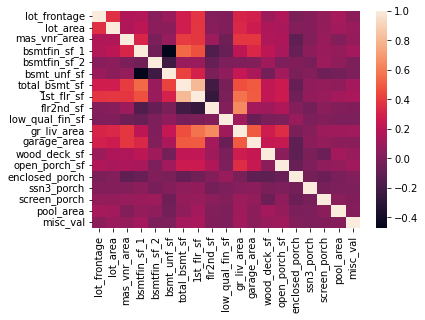

In [199]:
sns.heatmap(df[continuous].corr());

In [200]:
continuous_tbu = ['lot_frontage','lot_area','mas_vnr_area','area_sf']

In [201]:
df[discrete+['saleprice']].corr()

,year_built,year_remod/add,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,mo_sold,yr_sold,saleprice
year_built,1.000000,0.628894,0.216147,-0.031170,0.479963,0.283745,-0.041607,-0.127090,0.137984,0.168563,0.768345,0.543334,-0.007649,-0.003233,0.571592
year_remod/add,0.628894,1.000000,0.154273,-0.037641,0.471351,0.224593,-0.019218,-0.135859,0.202607,0.138573,0.632310,0.440346,0.011038,0.043073,0.550112
bsmt_full_bath,0.216147,0.154273,1.000000,-0.146767,-0.011077,-0.026441,-0.159579,-0.029388,-0.040104,0.163071,0.145001,0.173907,-0.008995,0.034969,0.283892
bsmt_half_bath,-0.031170,-0.037641,-0.146767,1.000000,-0.060086,-0.047444,0.012418,-0.079303,-0.054299,0.061360,-0.053906,-0.032502,0.026561,-0.010187,-0.045171
full_bath,0.479963,0.471351,-0.011077,-0.060086,1.000000,0.153977,0.344644,0.166041,0.519820,0.218646,0.466463,0.465904,0.049029,0.007364,0.537794
half_bath,0.283745,0.224593,-0.026441,-0.047444,0.153977,1.000000,0.230689,-0.040229,0.339589,0.203531,0.236268,0.232519,0.010891,0.001774,0.283511
bedroom_abvgr,-0.041607,-0.019218,-0.159579,0.012418,0.344644,0.230689,1.000000,0.227165,0.655479,0.079542,-0.044237,0.085760,0.068820,-0.011990,0.137681
kitchen_abvgr,-0.127090,-0.135859,-0.029388,-0.079303,0.166041,-0.040229,0.227165,1.000000,0.276643,-0.134696,-0.086293,-0.034190,0.047257,0.020743,-0.125373
totrms_abvgrd,0.137984,0.202607,-0.040104,-0.054299,0.519820,0.339589,0.655479,0.276643,1.000000,0.311889,0.164333,0.367914,0.054307,-0.022124,0.504316
fireplaces,0.168563,0.138573,0.163071,0.061360,0.218646,0.203531,0.079542,-0.134696,0.311889,1.000000,0.078729,0.311208,0.017918,0.007074,0.470936


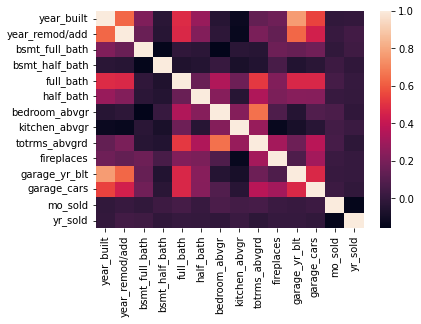

In [202]:
sns.heatmap(df[discrete].corr());

**bsmt_half_bath, yr_sold,mo_sold don't seem to have enough correaltion with DV**

**can combine tot_bath= full_bath + 0.5*half_bath and bsmt_bath=bsmt_full_bath+0.5*bsmt_half_bath
  abv_grd_combined= totrms_abvgrd+kitchen_abvgrd**
    
**garage_cars would be correlated with garage_area which is already accounted for in continuous case**

**garage_yr_blt can be dropped as it has high correlation with year_built**

In [203]:
df['tot_bath']=df.full_bath+0.5*df.half_bath
df['bsmt_bath']=df.bsmt_full_bath + 0.5*df.bsmt_half_bath
df['abv_grd_combined'] = df.totrms_abvgrd+df.kitchen_abvgr

**tbu stands for to be used**

In [204]:
discrete_tbu = ['year_built','tot_bath','bsmt_bath','abv_grd_combined']
# discrete features to be used 

In [205]:
nominal_tbu = ['ms_subclass','ms_zoning','neighborhood','land_contour','central_air']
# based on self analysis 

In [206]:
ordinal_tbu = ['utilities','overall_qual','heating_qc']
# based on self analysis 

#### Creating dummies for ordinal and nominal columns to be used in the model featured by analysis

In [207]:
df.ms_zoning.unique()

array(['RL', 'RM', 'FV', 'C', 'A', 'RH', 'I'], dtype=object)

In [208]:
df = pd.get_dummies(df, columns=nominal_tbu)


In [209]:
df.drop(columns= ['neighborhood_Veenker'],inplace=True)#dropping one dummy column for each category

In [210]:
df.drop(columns='land_contour_Low', inplace=True)#dropping one dummy column for each category

In [211]:
df.drop(columns='central_air_N', inplace=True)

In [212]:
df.drop(columns='ms_subclass_160',inplace=True)

In [213]:
df.drop(columns='ms_zoning_RH',inplace=True)

In [214]:
df.head()

,pid,lot_frontage,lot_area,street,lot_shape,utilities,lot_config,land_slope,condition_1,condition_2,...,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,land_contour_Bnk,land_contour_HLS,land_contour_Lvl,central_air_Y
0,533352170,43.0,13517,Pave,IR1,AllPub,CulDSac,Gtl,RRAe,Norm,...,0,1,0,0,0,0,0,0,1,1
1,531379050,43.0,11492,Pave,IR1,AllPub,CulDSac,Gtl,Norm,Norm,...,0,0,1,0,0,0,0,0,1,1
2,535304180,68.0,7922,Pave,Reg,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,1,1
3,916386060,73.0,9802,Pave,Reg,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,1,0,0,1,1
4,906425045,82.0,14235,Pave,IR1,AllPub,Inside,Gtl,Norm,Norm,...,0,0,1,0,0,0,0,0,1,1


In [215]:
df.utilities.value_counts()

AllPub    2048
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [216]:
df.drop(df[df.utilities!='AllPub'].index,inplace=True)

**So we don't need to take into consideration utilities feature as it is common for all entries now**

In [217]:
df.overall_qual.value_counts()
# seems good can be used as is

5     563
6     505
7     431
8     249
4     159
9      77
3      29
10     23
2       8
1       4
Name: overall_qual, dtype: int64

In [218]:
df.heating_qc.unique()
# can make Po as baseclass or drop it altogether

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [219]:
map_heating_qc ={'Ex':5, 'TA':4, 'Gd':3, 'Fa':2,'Po':1}
# mapping to numeric data

In [220]:
df.heating_qc =df.heating_qc.map(map_heating_qc)

In [221]:
ordinal_tbu = ['overall_qual','heating_qc']
#updated ordinal columns to be used

#### Features in the model

In [222]:
continuous_tbu = ['lot_frontage','lot_area','mas_vnr_area','area_sf']
ordinal_tbu = ['overall_qual','heating_qc']
discrete_tbu = ['year_built','tot_bath','bsmt_bath','abv_grd_combined']
nominal_tbu = ['ms_subclass','ms_zoning','neighborhood','land_contour','central_air']
nominal_withdummies_tbu =['neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Names', 'neighborhood_Timber', 'neighborhood_Edwards', 'neighborhood_OldTown',
       'neighborhood_BrDale', 'neighborhood_CollgCr', 'neighborhood_Somerst', 'neighborhood_Mitchel', 'neighborhood_StoneBr', 'neighborhood_NridgHt',
       'neighborhood_Gilbert', 'neighborhood_Crawfor', 'neighborhood_IDOTRR', 'neighborhood_NWAmes', 'neighborhood_MeadowV',
       'neighborhood_SWISU', 'neighborhood_NoRidge', 'neighborhood_ClearCr', 'neighborhood_Blmngtn', 'neighborhood_BrkSide', 'neighborhood_NPkVill',
       'neighborhood_Blueste', 'neighborhood_Greens', 
        'land_contour_Lvl', 'land_contour_HLS', 'land_contour_Bnk',
         'ms_subclass_060', 'ms_subclass_020', 'ms_subclass_050', 'ms_subclass_180', 'ms_subclass_070', 'ms_subclass_120', 'ms_subclass_190', 'ms_subclass_085',
       'ms_subclass_030', 'ms_subclass_090', 'ms_subclass_080', 'ms_subclass_075', 'ms_subclass_045', 'ms_subclass_040',
        'ms_zoning_RL', 'ms_zoning_RM', 'ms_zoning_FV', 'ms_zoning_C', 'ms_zoning_I',
                         'central_air_Y']


In [223]:
col_tbu_model= continuous_tbu+ordinal_tbu+discrete_tbu+nominal_withdummies_tbu
# final features to be used

#### Standard Scaling the dataframe's continuous values to be used

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
df[continuous]=pd.DataFrame(StandardScaler().fit_transform(df[continuous]), columns=df[continuous].columns)

In [226]:
df[continuous].isnull().sum()

lot_frontage       3
lot_area           3
mas_vnr_area       3
bsmtfin_sf_1       3
bsmtfin_sf_2       3
bsmt_unf_sf        3
total_bsmt_sf      3
1st_flr_sf         3
flr2nd_sf          3
low_qual_fin_sf    3
gr_liv_area        3
garage_area        3
wood_deck_sf       3
open_porch_sf      3
enclosed_porch     3
ssn3_porch         3
screen_porch       3
pool_area          3
misc_val           3
dtype: int64

In [227]:
df.area_sf = (df.area_sf-df.area_sf.mean())/df.area_sf.std()
#since it does not occur originally in continuous list,doing manually

In [228]:
df.area_sf.isnull().sum()#checking for nulls and confirming

0

In [229]:
df.dropna(inplace=True)#dropping any nulls for ease of analysis,so tired!!!

In [230]:
df.isnull().sum().sum()#no nulls

0

### Regression for model featured

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,\
                                 Lasso,LassoCV,Ridge
from statistics import mean, stdev
from sklearn.model_selection import cross_val_score,train_test_split

In [232]:
final_columns= col_tbu_model#this is the model after feature engineering

In [233]:
df[final_columns]#dataframe for the model developed

,lot_frontage,lot_area,mas_vnr_area,area_sf,overall_qual,heating_qc,year_built,tot_bath,bsmt_bath,abv_grd_combined,...,ms_subclass_080,ms_subclass_075,ms_subclass_045,ms_subclass_040,ms_zoning_RL,ms_zoning_RM,ms_zoning_FV,ms_zoning_C,ms_zoning_I,central_air_Y
0,-1.096689,0.513166,1.084293,-0.811024,6,5,1976,2.5,0.0,7,...,0,0,0,0,1,0,0,0,0,1
1,-1.096689,0.212722,0.185893,-0.484406,7,5,1996,2.5,1.0,9,...,0,0,0,0,1,0,0,0,0,1
2,-0.053077,-0.316949,-0.569449,0.575886,5,4,1953,1.0,1.0,6,...,0,0,0,0,1,0,0,0,0,1
3,0.155645,-0.038019,-0.569449,-1.566635,5,3,2006,2.5,0.0,8,...,0,0,0,0,1,0,0,0,0,1
4,0.531345,0.619694,-0.569449,-0.915835,6,4,1900,2.0,0.0,7,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,0.406112,0.206343,-0.569449,-0.594091,6,5,1939,1.5,0.0,7,...,0,0,0,0,0,1,0,0,0,1
2044,0.406112,0.338835,-0.569449,-0.798837,6,5,1995,2.5,0.0,7,...,0,0,0,0,1,0,0,0,0,1
2045,-0.512267,-0.370955,-0.569449,1.455807,8,5,2008,2.0,1.0,8,...,0,0,0,0,1,0,0,0,0,1
2046,0.447856,0.050705,-0.569449,2.469787,8,5,2007,2.0,1.0,8,...,0,0,0,0,1,0,0,0,0,1


In [234]:
X = df[final_columns].values # using the columns of the model that I thought of


In [235]:
y = np.log(df['saleprice'])
#log transform of saleprices

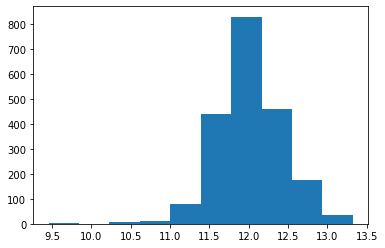

In [236]:
plt.hist(y);
# As is seen in the plot below, log transform is more normal hence in line with BLUE assumptions

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

In [238]:
test_data1=pd.read_csv('datasets/cleaned_test_data_for_prediction.csv')
#importing test data cleaned as per the reuirements of the thought model

In [243]:
test_data1.head()

,pid,lot_frontage,lot_area,mas_vnr_area,area_sf,overall_qual,heating_qc,year_built,tot_bath,bsmt_bath,...,ms_subclass_080,ms_subclass_075,ms_subclass_045,ms_subclass_040,ms_zoning_RL,ms_zoning_RM,ms_zoning_FV,ms_zoning_C,ms_zoning_I,central_air_Y
0,902301120,69.0,9142,0.0,640,6,3,1910,2.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,905108090,69.0,9662,0.0,1387,5,4,1977,2.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2,528218130,58.0,17104,0.0,252,7,5,2006,2.5,1.0,...,0,0,0,0,1,0,0,0,0,1
3,902207150,60.0,8520,0.0,488,5,4,1923,1.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,535105100,60.0,9500,247.0,956,6,3,1963,1.5,1.0,...,0,0,0,0,1,0,0,0,0,1


#### Simple Linear Regression Model 1

In [239]:
lm1 = LinearRegression()#instantiation

In [240]:
lm1.fit(X_train,y_train)#fit on train data

LinearRegression()

In [241]:
lm1.score(X_test,y_test)# score on X_test

0.8239282049452988

**The score is 0.82 seems overfit to me**

In [244]:
log_predicted_saleprice=lm1.predict(test_data1.drop(columns='pid'))
# predicted_test_data=pd.DataFrame(lm.predict(test_data),columns=test_data.columns)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [246]:
lm1.score(test_data1.drop(columns='pid'),log_predicted_saleprice)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


1.0

**This is absurd**

In [283]:
lm1.coef_

array([ 0.00868633,  0.00916324,  0.00293345,  0.03279361,  0.11517708,
        0.0148007 ,  0.00200739,  0.09409257,  0.10170251,  0.03622463,
       -0.17055792, -0.19125213, -0.171219  , -0.14696979, -0.24626709,
       -0.21920925, -0.28700914, -0.18935563, -0.15577144, -0.15934861,
        0.00292212, -0.00965795, -0.22308022, -0.0007084 , -0.26527369,
       -0.16112794, -0.26785847, -0.22072009, -0.02885881, -0.04201083,
       -0.11175204, -0.16007687, -0.20566912, -0.11400537, -0.10388921,
       -0.06141193, -0.01046322, -0.07535356,  0.21425175,  0.2176009 ,
        0.22787462,  0.14539054,  0.26618768,  0.09872667,  0.17810153,
        0.25721124,  0.15214177,  0.03855241,  0.18780067,  0.43717735,
        0.18295617,  0.23730277,  0.07996224,  0.05239472,  0.11732618,
       -0.11517078,  0.        ,  0.16949096])

In [247]:
model_1=pd.DataFrame()# to save the values for this model
model_1['id']=test_data1['pid']
model_1['saleprice']=np.exp(log_predicted_saleprice)

/var/folders/14/ql83cw_14pn_55xg8kg9ctcc0000gn/T/ipykernel_85105/4086391102.py:3: RuntimeWarning: overflow encountered in exp
  model_1['saleprice']=np.exp(log_predicted_saleprice)


In [248]:
model_1.to_csv('datasets/Model_1_SLR.csv',index=False)
# saving to a csv file

In [249]:
model_1.columns

Index(['id', 'saleprice'], dtype='object')

#### Simple Linear Regression Using just Continuous columns

In [252]:
df[continuous].columns

Index(['lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       'flr2nd_sf', 'low_qual_fin_sf', 'gr_liv_area', 'garage_area',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 'ssn3_porch',
       'screen_porch', 'pool_area', 'misc_val'],
      dtype='object')

In [253]:
X=df[continuous].values
y=df.saleprice

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

In [255]:
test_data2=pd.read_csv('datasets/Model_2_continuous.csv')

In [256]:
test_data2.columns

Index(['pid', 'lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       'flr2nd_sf', 'low_qual_fin_sf', 'gr_liv_area', 'garage_area',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 'ssn3_porch',
       'screen_porch', 'pool_area', 'misc_val'],
      dtype='object')

In [257]:
lm2 = LinearRegression()

In [258]:
lm2.fit(X_train,y_train)

LinearRegression()

In [259]:
lm2.score(X_test,y_test) #score on test within train data

-0.01581605824419241

**Too many outliers???**

In [284]:
lm2.coef_

array([ 4.15903265e+03, -2.51762062e+03,  5.39604681e+03, -2.46335440e+18,
       -8.80664749e+17, -2.37541303e+18,  2.39704693e+18,  2.08977173e+17,
        2.24394101e+17,  2.69327336e+16, -2.63799234e+17,  2.40596791e+03,
        2.48274160e+03,  3.68662242e+03, -2.42431685e+03,  8.95435485e+02,
       -3.07178860e+03, -1.17052060e+03, -3.57045646e+03])

**Weird coefficient values**

In [260]:
model_2_predicted_log_saleprice= lm2.predict(test_data2[continuous])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [262]:
lm2.score(test_data2[continuous],model_2_predicted_log_saleprice)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


1.0

**Again absurd!!!**

In [263]:
model_2=pd.DataFrame()# to save the values for this model
model_2['id']=test_data2['pid']
model_2['saleprice']=np.exp(model_2_predicted_log_saleprice)

/var/folders/14/ql83cw_14pn_55xg8kg9ctcc0000gn/T/ipykernel_85105/3122761135.py:3: RuntimeWarning: overflow encountered in exp
  model_2['saleprice']=np.exp(model_2_predicted_log_saleprice)


In [264]:
model_2.to_csv('datasets/Model_2_SLR.csv',index=False)# saving to a csv file

#### Ridge using continuous variables

In [273]:
from sklearn.linear_model import Ridge

In [278]:
ridge_test = Ridge(alpha=1.0).fit(X_train, y_train)

In [279]:
ridge_test.coef_

array([ 4196.82216562, -2509.89293824,  5758.23504028,   318.95156208,
        3230.11740113,   317.49430896,  1829.13456108,  5920.82577187,
        -136.47865831, -1103.27131381,  4461.64415395,  2317.77652068,
        2760.73211338,  4021.98609478, -2235.46728988,   878.00761209,
       -3020.50973877, -1093.07310396, -3692.447989  ])

- These are the coefficients for the continuous variables that we have used in the regression.The positive values indicate positive effect and negative values indicate negative effect for one unit increase in the respective independent variables.

- These coefficients are lesser in magnitude compared to the coefficients of lm2 above which uses a Linear ARegression Model for continuous variables.

In [287]:
ridge_test.score(X_test,y_test)#score for this regression

-0.010307615846712803

In [292]:
predicted_by_ridge= ridge_test.predict(test_data2.drop(columns='pid'))

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [293]:
model_ridge=pd.DataFrame()# to save the values for this model
model_ridge['id']=test_data2['pid']
model_ridge['saleprice']=np.exp(predicted_by_ridge)

/var/folders/14/ql83cw_14pn_55xg8kg9ctcc0000gn/T/ipykernel_85105/1212366052.py:3: RuntimeWarning: overflow encountered in exp
  model_ridge['saleprice']=np.exp(predicted_by_ridge)


In [294]:
model_ridge.to_csv('datasets/Model_ridge.csv',index=False)
# saving to a csv file

#### Lasso using continuous variables

In [280]:
lasso_cv = LassoCV(cv=10).fit(X_train, y_train)

In [281]:
lasso_cv.alphas_

array([1.48556063e+04, 1.38543882e+04, 1.29206488e+04, 1.20498403e+04,
       1.12377214e+04, 1.04803366e+04, 9.77399698e+03, 9.11526229e+03,
       8.50092412e+03, 7.92799029e+03, 7.39367028e+03, 6.89536164e+03,
       6.43063735e+03, 5.99723391e+03, 5.59304042e+03, 5.21608821e+03,
       4.86454133e+03, 4.53668752e+03, 4.23092997e+03, 3.94577945e+03,
       3.67984712e+03, 3.43183774e+03, 3.20054336e+03, 2.98483745e+03,
       2.78366940e+03, 2.59605940e+03, 2.42109368e+03, 2.25792007e+03,
       2.10574381e+03, 1.96382373e+03, 1.83146858e+03, 1.70803373e+03,
       1.59291797e+03, 1.48556063e+03, 1.38543882e+03, 1.29206488e+03,
       1.20498403e+03, 1.12377214e+03, 1.04803366e+03, 9.77399698e+02,
       9.11526229e+02, 8.50092412e+02, 7.92799029e+02, 7.39367028e+02,
       6.89536164e+02, 6.43063735e+02, 5.99723391e+02, 5.59304042e+02,
       5.21608821e+02, 4.86454133e+02, 4.53668752e+02, 4.23092997e+02,
       3.94577945e+02, 3.67984712e+02, 3.43183774e+02, 3.20054336e+02,
      

In [282]:
lasso_cv.coef_

array([ 2882.22187291,  -558.57251184,  5086.894191  ,     0.        ,
        1943.00656676,     0.        ,  2280.72754629,  5271.14674612,
           0.        ,    -0.        ,  3629.25937596,  2415.70606342,
        2014.3957693 ,  2885.58142354, -1385.24077436,     0.        ,
       -1757.38230723,    -0.        , -1921.73394142])

- These are the coefficients for the continuous variables that we have used in the regression.The positive values indicate positive effect and negative values indicate negative effect for one unit increase in the respective independent variables.

- These coefficients are lesser in magnitude compared to the coefficients of lm2 above which uses a Linear ARegression Model for continuous variables.

In [288]:
lasso_cv.score(X_test,y_test)
#score for this model

0.008861816956685975

In [296]:
predicted_by_lasso= lasso_cv.predict(test_data2.drop(columns='pid'))

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [297]:
model_lasso=pd.DataFrame()# to save the values for this model
model_lasso['id']=test_data2['pid']
model_lasso['saleprice']=np.exp(predicted_by_lasso)

/var/folders/14/ql83cw_14pn_55xg8kg9ctcc0000gn/T/ipykernel_85105/1298191213.py:3: RuntimeWarning: overflow encountered in exp
  model_lasso['saleprice']=np.exp(predicted_by_lasso)


In [298]:
model_lasso.to_csv('datasets/Model_lasso.csv',index=False)
# saving to a csv file

**Ridge and lasso performed better, gave less absurd results**